In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [24]:
df = pd.read_csv(r"enrolment.csv")

In [25]:
df.dropna(inplace=True)
df.head()

date        state         district  pincode  age_0_5  age_5_17  \
0  01-09-2025  Maharashtra  Mumbai Suburban   400024        1         0   
1  01-09-2025  Maharashtra  Mumbai Suburban   400050        0         1   
2  01-09-2025  Maharashtra  Mumbai Suburban   400053        4         0   
3  01-09-2025  Maharashtra  Mumbai Suburban   400057        0         1   
4  01-09-2025  Maharashtra  Mumbai Suburban   400070        4         3   

   age_18_greater  
0               0  
1               0  
2               0  
3               0  
4               0

In [26]:
df_new = df.groupby('pincode').agg(
    total_children_enrolled = ('age_0_5' , 'sum'),
    total_teenagers_enrolled = ('age_5_17' , 'sum'),
    total_adults_enrolled = ('age_18_greater' , 'sum'),
    pincode_count = ('pincode' , 'count')
).reset_index()

In [27]:
def get_priority(value):
    if value >= (df_new_avg * 1.5):
        return 'High : Expnand Facilities'
    if value < df_new_avg:
        return 'medium : Maintain Facilities'
    return 'Low : Monitor Facilities'

In [28]:
def get_performance(index):
    if index >= 2.5:
        return 'Excellent Performance'
    if index >= 1.5:
        return 'Good Performance'
    if index >= 0.75:
        return 'Average Performance'
    return 'Poor Performance'

In [29]:
def get_ad_type(row):
    segments = {
        'Family/Child Ads' : row['total_children_enrolled'],
        'youth/Teenager Ads' : row['total_teenagers_enrolled'],
        'Adult Ads' : row['total_adults_enrolled']
    }
    return max(segments, key=segments.get)

In [30]:
import warnings
warnings.filterwarnings("ignore")
df_new["total_enrolment"] = df_new["total_children_enrolled"] + df_new["total_teenagers_enrolled"] + df_new["total_adults_enrolled"]
df_new["total_enrolment_per_pincode"] = df_new["total_enrolment"] / df_new["pincode_count"]
df_new["total_enrolment_per_pincode"] = df_new["total_enrolment_per_pincode"].round(2)
df_new["total_children_enrolled_ratio_per_pincode"] = df_new["total_children_enrolled"] / df_new["pincode_count"]
df_new["total_children_enrolled_ratio_per_pincode"] = df_new["total_children_enrolled_ratio_per_pincode"].round(2)
df_new["total_teenagers_enrolled_ratio_per_pincode"] = df_new["total_teenagers_enrolled"] / df_new["pincode_count"]
df_new["total_teenagers_enrolled_ratio_per_pincode"] = df_new["total_teenagers_enrolled_ratio_per_pincode"].round(2)
df_new["total_adults_enrolled_ratio_per_pincode"] = df_new["total_adults_enrolled"] / df_new["pincode_count"]
df_new["total_adults_enrolled_ratio_per_pincode"] = df_new["total_adults_enrolled_ratio_per_pincode"].round(2)
df_new["enrolment_index"] = (df_new["total_enrolment"] / df_new["total_enrolment"].mean()).round(2)
df_new["children_enrolment_index"] = (df_new["total_children_enrolled"] / df_new["total_children_enrolled"].mean()).round(2)
df_new["children_pct"] = df_new["total_children_enrolled_ratio_per_pincode"] * 100
df_new["teen_pct"] = df_new["total_teenagers_enrolled_ratio_per_pincode"] * 100
df_new["adult_pct"] = df_new["total_adults_enrolled_ratio_per_pincode"] * 100
df_new_avg = df_new["total_enrolment_per_pincode"].mean().round(2)
df["expand_pripority"] = df_new["total_enrolment_per_pincode"].apply(get_priority)
df["Performance_Category"] = df_new["enrolment_index"].apply(get_performance)
df_new["recommended_ad_type"] = df_new.apply(get_ad_type, axis=1)
df_new

pincode  total_children_enrolled  total_teenagers_enrolled  \
0    400024                       58                        19   
1    400029                       34                         7   
2    400042                      105                        23   
3    400043                     1866                      1247   
4    400049                       40                        17   
5    400050                      206                        88   
6    400051                      399                       182   
7    400052                       53                        19   
8    400053                      234                       121   
9    400054                       64                        36   
10   400055                      184                        45   
11   400056                       69                        18   
12   400057                       64                        13   
13   400058                      310                        79   
14   400059                      268                       111   
15   400060                      148                        40   
16   400061                       84                        18   
17   400063                      136                        48   
18   400064                      224                        46   
19   400065                      159                        65   
20   400066                      204                        57   
21   400067                      487                       203   
22   400068                      293                        91   
23   400069                       79                        19   
24   400070                      980                       455   
25   400071                      432                       175   
26   400072                     1203                       652   
27   400074                      355                       121   
28   400075                      120                        30   
29   400076                      139                        60   
30   400077                       79                        20   
31   400078                      647                       260   
32   400079                       79                        17   
33   400080                      366                       121   
34   400081                       75                        21   
35   400082                       20                         6   
36   400083                      170                        43   
37   400084                       97                        31   
38   400085                        1                         0   
39   400086                      261                        64   
40   400087                       29                         6   
41   400088                      393                       146   
42   400089                       99                        32   
43   400091                       60                        28   
44   400092                      153                        48   
45   400093                      157                        31   
46   400094                       27                         9   
47   400095                      408                       221   
48   400097                      459                       177   
49   400098                       23                        10   
50   400099                       83                        34   
51   400101                      384                       179   
52   400102                      200                        87   
53   400103                       72                        27   
54   400104                      263                        73   

    total_adults_enrolled  pincode_count  total_enrolment  \
0                       2             47               79   
1                       1             28               42   
2                       2             63              130   
3                      56             88             3169   
4 

In [31]:
df_new = (
    df_new
    .sort_values(by="pincode_count", ascending=False)
    .reset_index(drop=True)
)
df_new

pincode  total_children_enrolled  total_teenagers_enrolled  \
0    400072                     1203                       652   
1    400101                      384                       179   
2    400043                     1866                      1247   
3    400097                      459                       177   
4    400070                      980                       455   
5    400086                      261                        64   
6    400067                      487                       203   
7    400104                      263                        73   
8    400095                      408                       221   
9    400066                      204                        57   
10   400058                      310                        79   
11   400051                      399                       182   
12   400068                      293                        91   
13   400078                      647                       260   
14   400071                      432                       175   
15   400088                      393                       146   
16   400102                      200                        87   
17   400055                      184                        45   
18   400064                      224                        46   
19   400074                      355                       121   
20   400050                      206                        88   
21   400083                      170                        43   
22   400065                      159                        65   
23   400080                      366                       121   
24   400093                      157                        31   
25   400063                      136                        48   
26   400059                      268                       111   
27   400053                      234                       121   
28   400092                      153                        48   
29   400075                      120                        30   
30   400089                       99                        32   
31   400042                      105                        23   
32   400060                      148                        40   
33   400099                       83                        34   
34   400084                       97                        31   
35   400069                       79                        19   
36   400091                       60                        28   
37   400076                      139                        60   
38   400054                       64                        36   
39   400061                       84                        18   
40   400081                       75                        21   
41   400056                       69                        18   
42   400103                       72                        27   
43   400057                       64                        13   
44   400077                       79                        20   
45   400079                       79                        17   
46   400024                       58                        19   
47   400052                       53                        19   
48   400049                       40                        17   
49   400029                       34                         7   
50   400094                       27                         9   
51   400087                       29                         6   
52   400098                       23                        10   
53   400082                       20                         6   
54   400085                        1                         0   

    total_adults_enrolled  pincode_count  total_enrolment  \
0                     100             90             1955   
1                      27             88              590   
2                      56             88             3169   
3                      37             86              673   
4 

In [32]:
for col in df_new.columns:
    if col != 'pincode_count' and col != 'pincode':
        print(f"Top 10 highest enrolmnet pincodes for {col}")
        print(f"focus this pincode for better outreach programs for {col}")
        print(df_new.nlargest(10, col)["pincode"].values)
        print("\n")

Top 10 highest enrolmnet pincodes for total_children_enrolled
focus this pincode for better outreach programs for total_children_enrolled
[400043 400072 400070 400078 400067 400097 400071 400095 400051 400088]


Top 10 highest enrolmnet pincodes for total_teenagers_enrolled
focus this pincode for better outreach programs for total_teenagers_enrolled
[400043 400072 400070 400078 400095 400067 400051 400101 400097 400071]


Top 10 highest enrolmnet pincodes for total_adults_enrolled
focus this pincode for better outreach programs for total_adults_enrolled
[400072 400070 400043 400071 400050 400095 400097 400080 400067 400076]


Top 10 highest enrolmnet pincodes for total_enrolment
focus this pincode for better outreach programs for total_enrolment
[400043 400072 400070 400078 400067 400097 400095 400071 400051 400101]


Top 10 highest enrolmnet pincodes for total_enrolment_per_pincode
focus this pincode for better outreach programs for total_enrolment_per_pincode
[400043 400072 400070 40

TypeError: Column 'recommended_ad_type' has dtype object, cannot use method 'nlargest' with this dtype

In [ ]:
import json

result = {}

for col in df_new.columns:
    if col != "pincode_count" and col != "pincode":
        top10 = df_new.nlargest(10, col)[["pincode", col]]
        result[col] = top10.to_dict(orient="records")

print(json.dumps(result, indent=4))

{
    "total_children_enrolled": [
        {
            "pincode": 400043,
            "total_children_enrolled": 1866
        },
        {
            "pincode": 400072,
            "total_children_enrolled": 1203
        },
        {
            "pincode": 400070,
            "total_children_enrolled": 980
        },
        {
            "pincode": 400078,
            "total_children_enrolled": 647
        },
        {
            "pincode": 400067,
            "total_children_enrolled": 487
        },
        {
            "pincode": 400097,
            "total_children_enrolled": 459
        },
        {
            "pincode": 400071,
            "total_children_enrolled": 432
        },
        {
            "pincode": 400095,
            "total_children_enrolled": 408
        },
        {
            "pincode": 400051,
            "total_children_enrolled": 399
        },
        {
            "pincode": 400088,
            "total_children_enrolled": 393
        }
    ],
    "to

In [ ]:
for col in df_new.columns:
    if col != 'pincode_count' and col != 'pincode':
        print(f"Top 10 highest enrolmnet pincodes for {col}")
        print(f"focus this pincode for better outreach programs for {col}")
        print(df_new.nsmallest(10, col)["pincode"].values)
        print("\n")

Top 10 highest enrolmnet pincodes for total_children_enrolled
focus this pincode for better outreach programs for total_children_enrolled
[400085 400082 400098 400094 400087 400029 400049 400052 400024 400091]


Top 10 highest enrolmnet pincodes for total_teenagers_enrolled
focus this pincode for better outreach programs for total_teenagers_enrolled
[400085 400087 400082 400029 400094 400098 400057 400079 400049 400061]


Top 10 highest enrolmnet pincodes for total_adults_enrolled
focus this pincode for better outreach programs for total_adults_enrolled
[400029 400087 400085 400075 400042 400081 400077 400079 400024 400049]


Top 10 highest enrolmnet pincodes for total_enrolment
focus this pincode for better outreach programs for total_enrolment
[400085 400082 400098 400087 400094 400029 400049 400024 400057 400052]




In [ ]:
df_new = df_new[~(df_new['pincode'] == 400085)]
df_new
#this pincode has abnormally low enrolment numbers removing it for better analysis(low time appear this in data as well)


pincode  total_children_enrolled  total_teenagers_enrolled  \
0    400072                     1203                       652   
1    400101                      384                       179   
2    400043                     1866                      1247   
3    400097                      459                       177   
4    400070                      980                       455   
5    400086                      261                        64   
6    400067                      487                       203   
7    400104                      263                        73   
8    400095                      408                       221   
9    400066                      204                        57   
10   400058                      310                        79   
11   400051                      399                       182   
12   400068                      293                        91   
13   400078                      647                       260   
14   400071                      432                       175   
15   400088                      393                       146   
16   400102                      200                        87   
17   400055                      184                        45   
18   400064                      224                        46   
19   400074                      355                       121   
20   400050                      206                        88   
21   400083                      170                        43   
22   400065                      159                        65   
23   400080                      366                       121   
24   400093                      157                        31   
25   400063                      136                        48   
26   400059                      268                       111   
27   400053                      234                       121   
28   400092                      153                        48   
29   400075                      120                        30   
30   400089                       99                        32   
31   400042                      105                        23   
32   400060                      148                        40   
33   400099                       83                        34   
34   400084                       97                        31   
35   400069                       79                        19   
36   400091                       60                        28   
37   400076                      139                        60   
38   400054                       64                        36   
39   400061                       84                        18   
40   400081                       75                        21   
41   400056                       69                        18   
42   400103                       72                        27   
43   400057                       64                        13   
44   400077                       79                        20   
45   400079                       79                        17   
46   400024                       58                        19   
47   400052                       53                        19   
48   400049                       40                        17   
49   400029                       34                         7   
50   400094                       27                         9   
51   400087                       29                         6   
52   400098                       23                        10   
53   400082                       20                         6   

    total_adults_enrolled  pincode_count  total_enrolment  
0                     100             90             1955  
1                      27             88              590  
2                      56             88             3169  
3                      37             86              673  
4                      60             85             1495  
5            

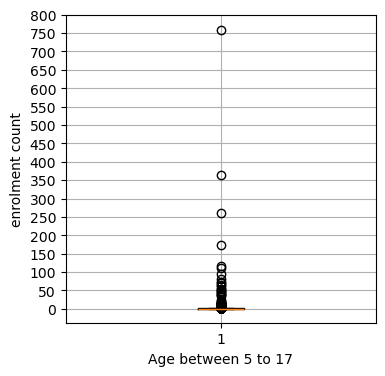

In [ ]:
plt.figure(figsize=(4,4))
plt.boxplot(df["age_5_17"])
plt.grid(True)
plt.xlabel("Age between 5 to 17")
plt.ylabel("enrolment count")
plt.yticks(np.arange(0 , df["age_5_17"].max() + 50 , 50))
plt.show()

In [ ]:
df.shape

(3442, 7)

In [ ]:
df.isna().sum()

date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64

In [ ]:
df.describe()

pincode      age_0_5     age_5_17  age_18_greater
count    3442.000000  3442.000000  3442.000000     3442.000000
mean   400072.966589     3.951772     1.683905        0.246949
std        18.395389    20.818405    16.035290        1.790713
min    400024.000000     0.000000     0.000000        0.000000
25%    400059.000000     1.000000     0.000000        0.000000
50%    400072.000000     2.000000     0.000000        0.000000
75%    400088.000000     3.000000     1.000000        0.000000
max    400104.000000   854.000000   758.000000       52.000000

In [ ]:
for col in df.columns:
    print(f"the values counts fro {col} is {df[col].value_counts()}")
    print(f"the count of {col} is {df[col].value_counts().count()}")

the values counts fro date is date
15-11-2025    53
15-12-2025    53
18-11-2025    52
22-12-2025    51
31-12-2025    51
              ..
30-09-2025     4
01-04-2025     3
28-09-2025     3
04-11-2025     1
23-10-2025     1
Name: count, Length: 95, dtype: int64
the count of date is 95
the values counts fro state is state
Maharashtra    3442
Name: count, dtype: int64
the count of state is 1
the values counts fro district is district
Mumbai Suburban    3442
Name: count, dtype: int64
the count of district is 1
the values counts fro pincode is pincode
400072    90
400101    88
400043    88
400097    86
400070    85
400086    84
400067    83
400104    83
400095    82
400058    82
400066    82
400051    79
400068    79
400078    78
400071    77
400055    76
400088    76
400102    76
400064    74
400074    72
400050    71
400083    71
400093    70
400080    70
400065    70
400063    69
400059    68
400092    65
400053    65
400075    64
400042    63
400089    63
400060    59
400099    59
400084

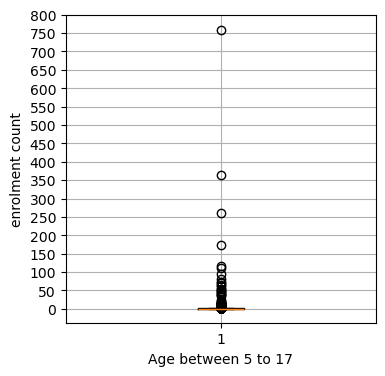

In [ ]:
plt.figure(figsize=(4,4))
plt.boxplot(df["age_5_17"])
plt.grid(True)
plt.xlabel("Age between 5 to 17")
plt.ylabel("enrolment count")
plt.yticks(np.arange(0 , df["age_5_17"].max() + 50 , 50))
plt.show()
# there are some outliers in age_5_17 column which can be removed for better analysis
df = df[df["age_5_17"] < 400]

In [ ]:
df_num = (
    df.drop(columns=["date", "pincode"])
      .select_dtypes(include=["number"])
)


the graph for age_0_5


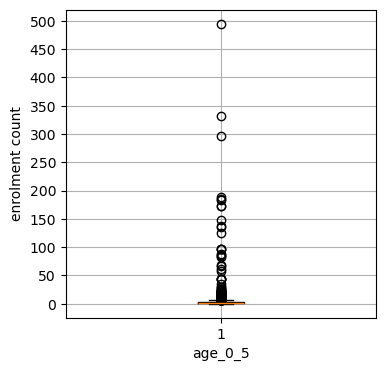

the graph for age_5_17


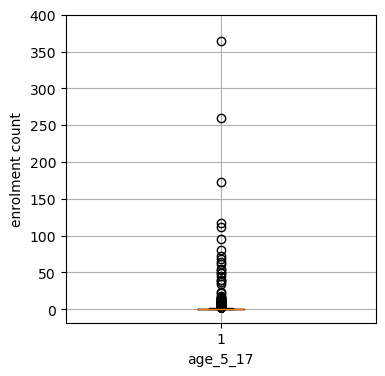

the graph for age_18_greater


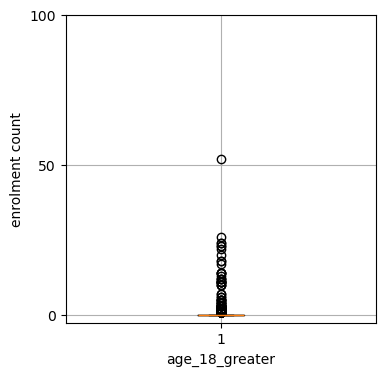

In [ ]:
for col in df_num.columns:
    plt.figure(figsize=(4,4))
    plt.boxplot(df_num[col])
    plt.grid(True)
    plt.xlabel(f"{col}")
    plt.ylabel("enrolment count")
    print(f"the graph for {col}")
    plt.yticks(np.arange(0 , df_num[col].max() + 50 , 50))
    plt.show()

In [ ]:
# there are some outliers in age_18_greater column which can be removed for better analysis
df = df[df["age_18_greater"] < 50]
df = df[df["age_0_5"] < 350]

the graph for age_0_5


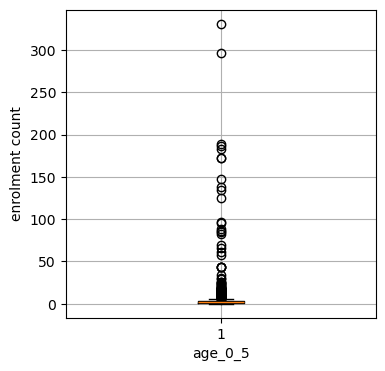

the graph for age_5_17


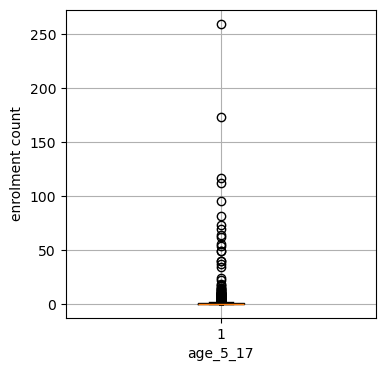

the graph for age_18_greater


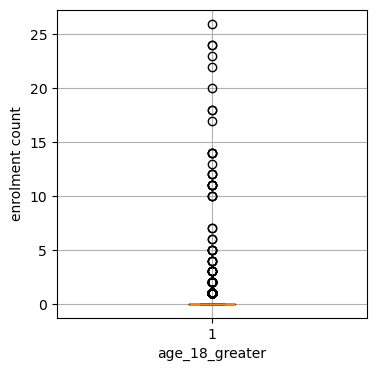

In [ ]:
df_num = (
    df.drop(columns=["date", "pincode"])
      .select_dtypes(include=["number"])
)
for col in df_num.columns:
    plt.figure(figsize=(4,4))
    plt.boxplot(df_num[col])
    plt.grid(True)
    plt.xlabel(f"{col}")
    plt.ylabel("enrolment count")
    print(f"the graph for {col}")
    plt.show()

In [ ]:
df.shape

(3439, 7)

In [ ]:
df.loc[df["age_18_greater"].idxmax()]


date                   01-05-2025
state                 Maharashtra
district          Mumbai Suburban
pincode                    400097
age_0_5                        66
age_5_17                       40
age_18_greater                 26
Name: 11, dtype: object

In [ ]:
df.loc[df["age_5_17"].idxmax()]

date                   01-07-2025
state                 Maharashtra
district          Mumbai Suburban
pincode                    400070
age_0_5                       331
age_5_17                      260
age_18_greater                 14
Name: 2097, dtype: object

In [ ]:
df.loc[df["age_0_5"].idxmax()]

date                   01-07-2025
state                 Maharashtra
district          Mumbai Suburban
pincode                    400070
age_0_5                       331
age_5_17                      260
age_18_greater                 14
Name: 2097, dtype: object

In [ ]:
top_df = df_new.sort_values(by = 'pincode' , ascending=True)
print(top_df.shape)
top_df.head()

(54, 6)


pincode  total_children_enrolled  total_teenagers_enrolled  \
46   400024                       58                        19   
49   400029                       34                         7   
31   400042                      105                        23   
2    400043                     1866                      1247   
48   400049                       40                        17   

    total_adults_enrolled  pincode_count  total_enrolment  
46                      2             47               79  
49                      1             28               42  
31                      2             63              130  
2                      56             88             3169  
48                      2             38               59

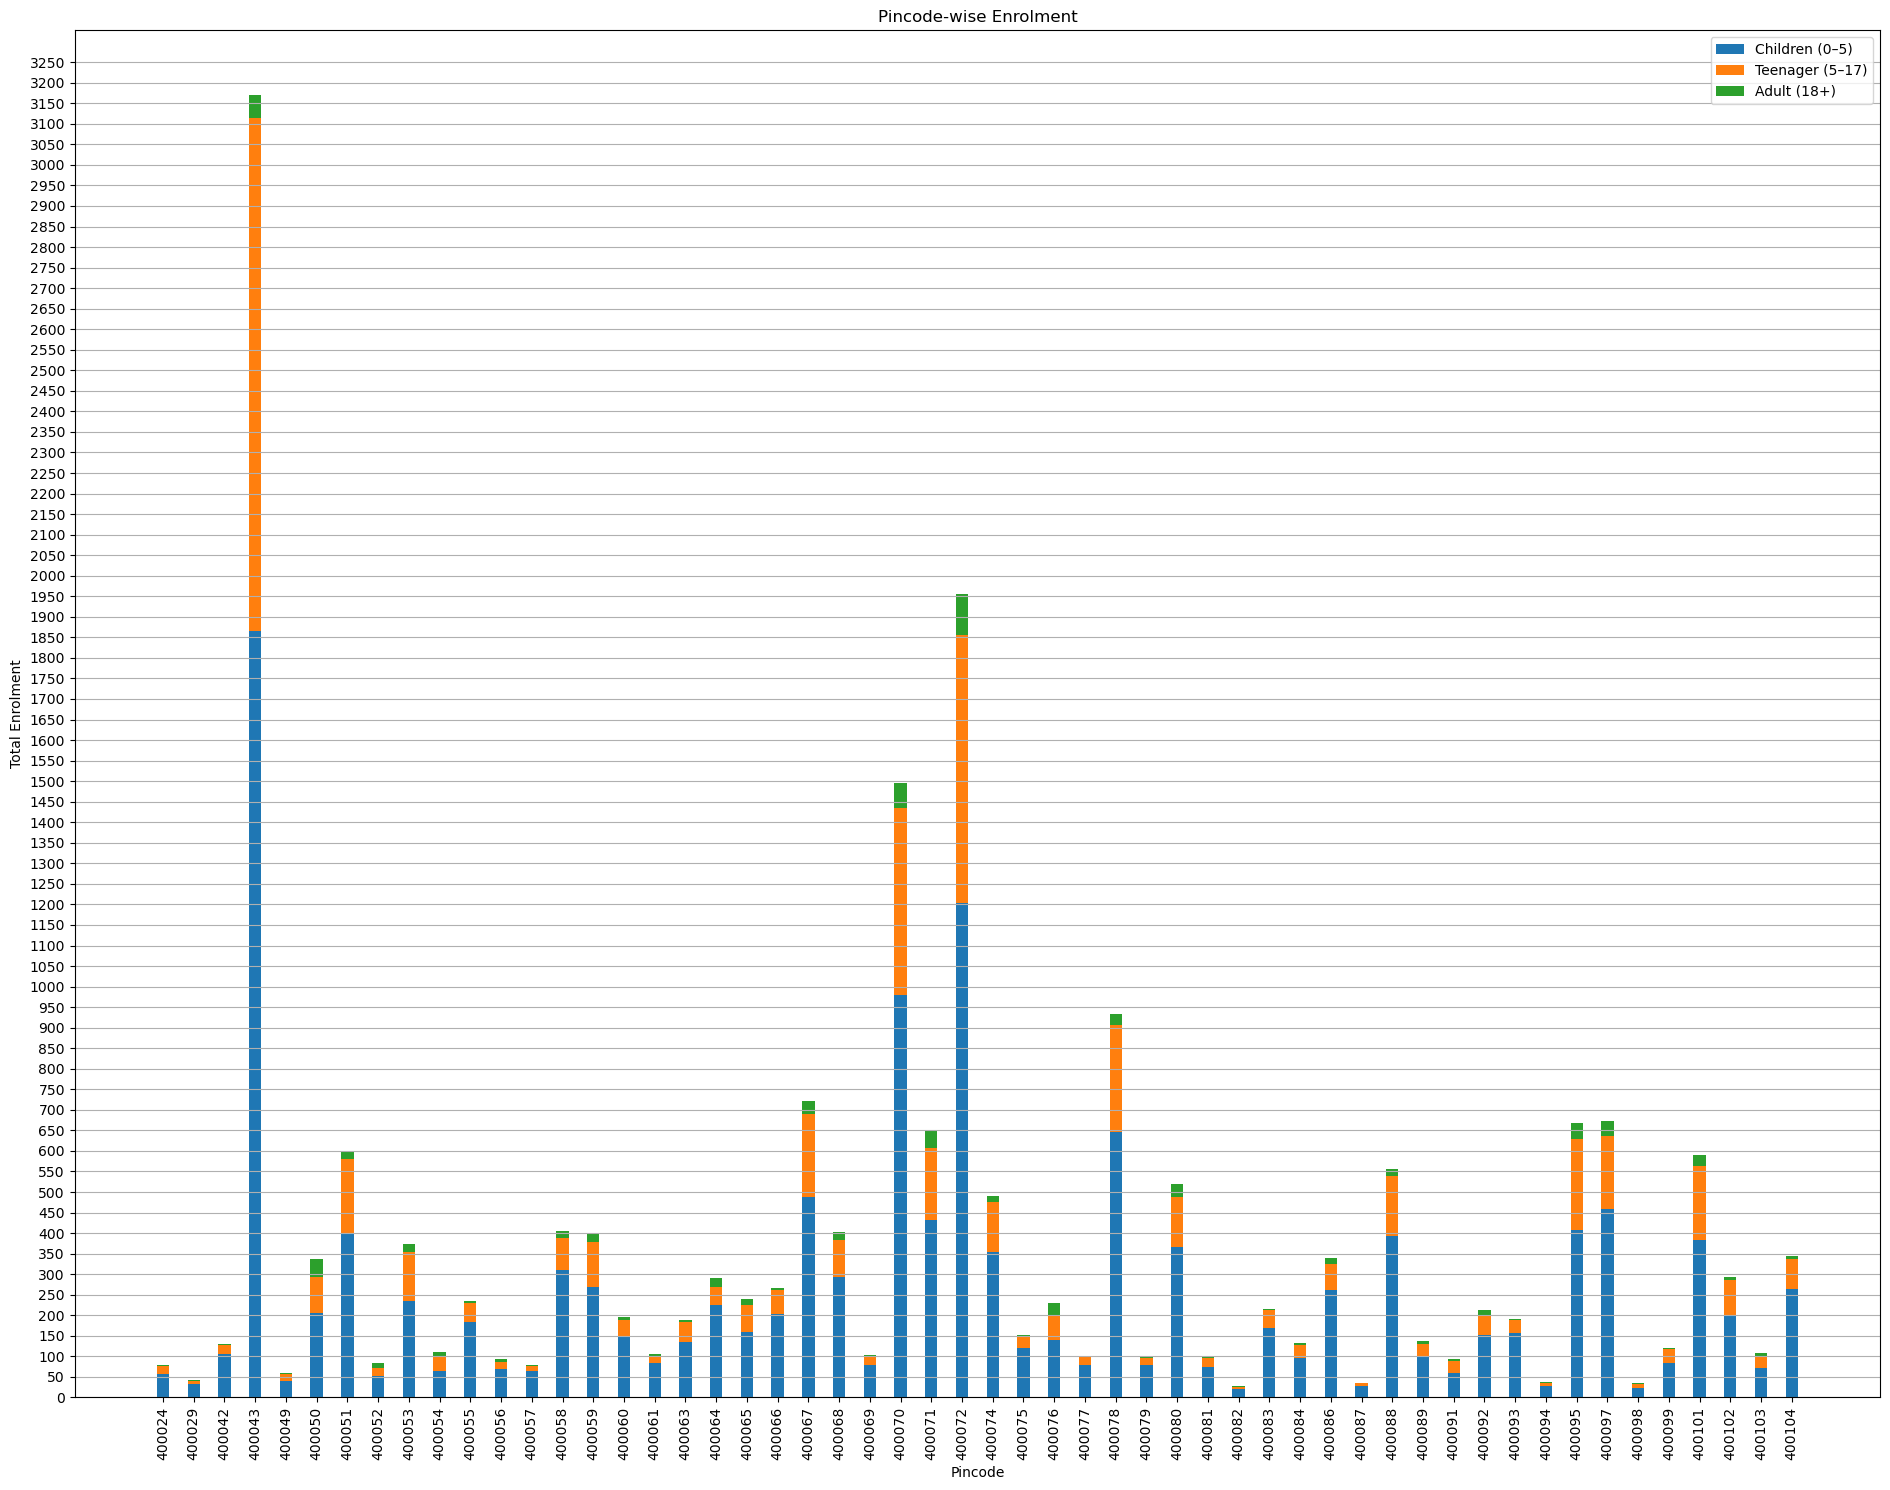

In [ ]:
plt.figure(figsize=(19, 15))
width = 0.4
x = np.arange(len(top_df["pincode"]))

plt.bar(x, top_df["total_children_enrolled"], width , label="Children (0–5)")
plt.bar(
    x,
    top_df["total_teenagers_enrolled"],
    width,
    bottom=top_df["total_children_enrolled"],
    label="Teenager (5–17)"
)
plt.bar(
    x,
    top_df["total_adults_enrolled"],
    width,
    bottom=top_df["total_children_enrolled"] + top_df["total_teenagers_enrolled"],
    label="Adult (18+)"
)

plt.xlabel("Pincode")
plt.ylabel("Total Enrolment")
plt.title("Pincode-wise Enrolment")

plt.xticks(x, top_df["pincode"], rotation=90)
plt.yticks(np.arange(0, top_df[["total_children_enrolled", "total_teenagers_enrolled", "total_adults_enrolled"]].sum(axis=1).max() + 100, 50))
plt.legend()
plt.grid(axis="y")
plt.tight_layout()
plt.show()


In [35]:
df1 = df
df1['date'] = pd.to_datetime(df1['date'], format="%d-%m-%Y")
df1 = df1.sort_values(by=['date' , 'pincode']).reset_index(drop=True)
df1.head()

date        state         district  pincode  age_0_5  age_5_17  \
0 2025-04-01  Maharashtra  Mumbai Suburban   400058       82        13   
1 2025-04-01  Maharashtra  Mumbai Suburban   400070      135        34   
2 2025-04-01  Maharashtra  Mumbai Suburban   400072      172        62   
3 2025-05-01  Maharashtra  Mumbai Suburban   400043      183       117   
4 2025-05-01  Maharashtra  Mumbai Suburban   400064       43        12   

   age_18_greater              expand_pripority Performance_Category  
0              10  medium : Maintain Facilities     Poor Performance  
1              22                           NaN                  NaN  
2              12                           NaN                  NaN  
3              24                           NaN                  NaN  
4              14                           NaN                  NaN

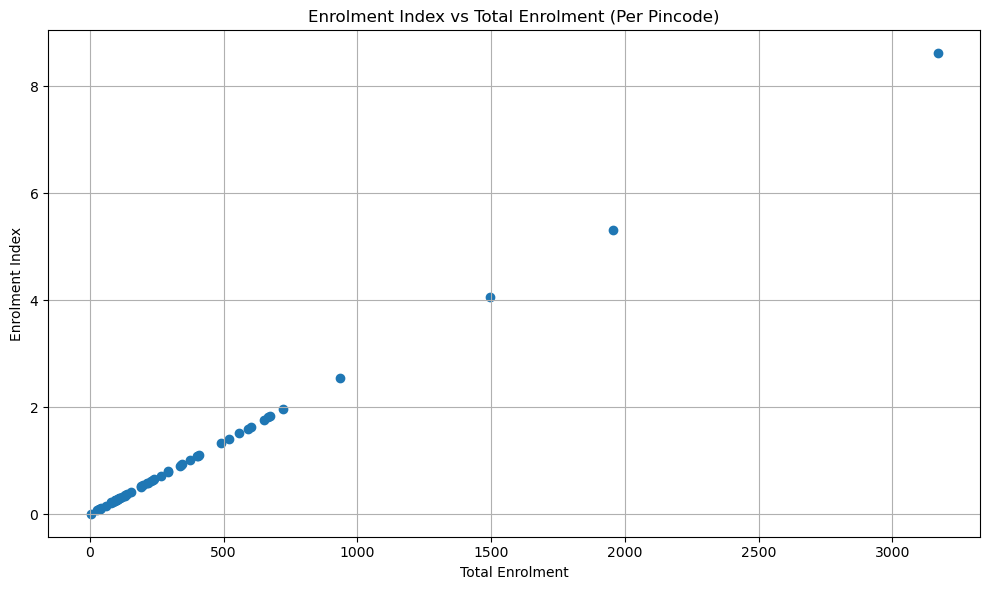

In [36]:
plt.figure(figsize=(10, 6))

plt.scatter(
    df_new["total_enrolment"],
    df_new["enrolment_index"]
)

plt.xlabel("Total Enrolment")
plt.ylabel("Enrolment Index")
plt.title("Enrolment Index vs Total Enrolment (Per Pincode)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [37]:
plt.figure(figsize=(16, 7))
width = 0.5
plt.bar(x , top_df["pincode_count"] , width , label="Pincode Count")
plt.xlabel("Pincode")
plt.ylabel("Count")
plt.title("Pincode Count Distribution")
plt.xticks(x, top_df["pincode"], rotation=90)
plt.yticks(np.arange(0, top_df["pincode_count"].max() + 10, 5))
plt.legend()
plt.grid(axis="y")
plt.tight_layout()
plt.show()

NameError: name 'top_df' is not defined

<Figure size 1600x700 with 0 Axes>

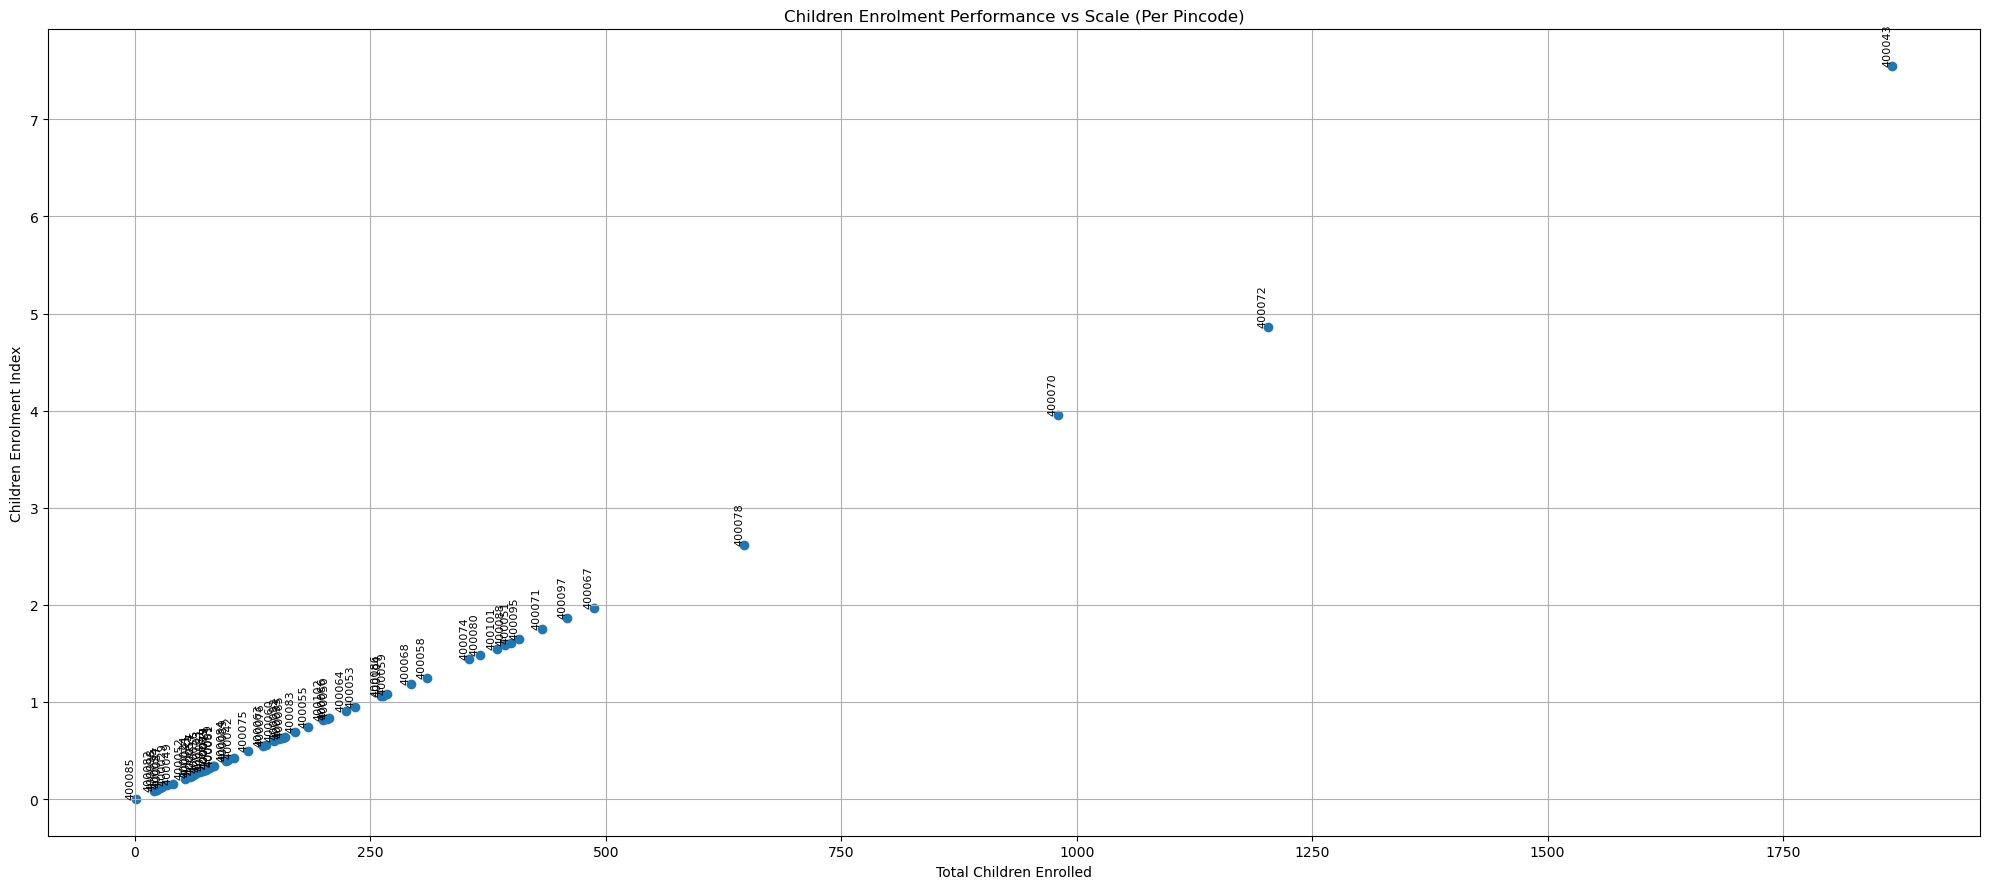

In [38]:
plt.figure(figsize=(20, 9))

plt.scatter(
    df_new["total_children_enrolled"],
    df_new["children_enrolment_index"]
)

for i, pincode in enumerate(df_new["pincode"]):
    plt.text(
        df_new["total_children_enrolled"].iloc[i],
        df_new["children_enrolment_index"].iloc[i],
        str(pincode),
        fontsize=8,
        ha="right",
        rotation = 90,
        va="bottom"
    )

plt.xlabel("Total Children Enrolled")
plt.ylabel("Children Enrolment Index")
plt.title("Children Enrolment Performance vs Scale (Per Pincode)")
plt.grid(True)
plt.tight_layout()
plt.show()


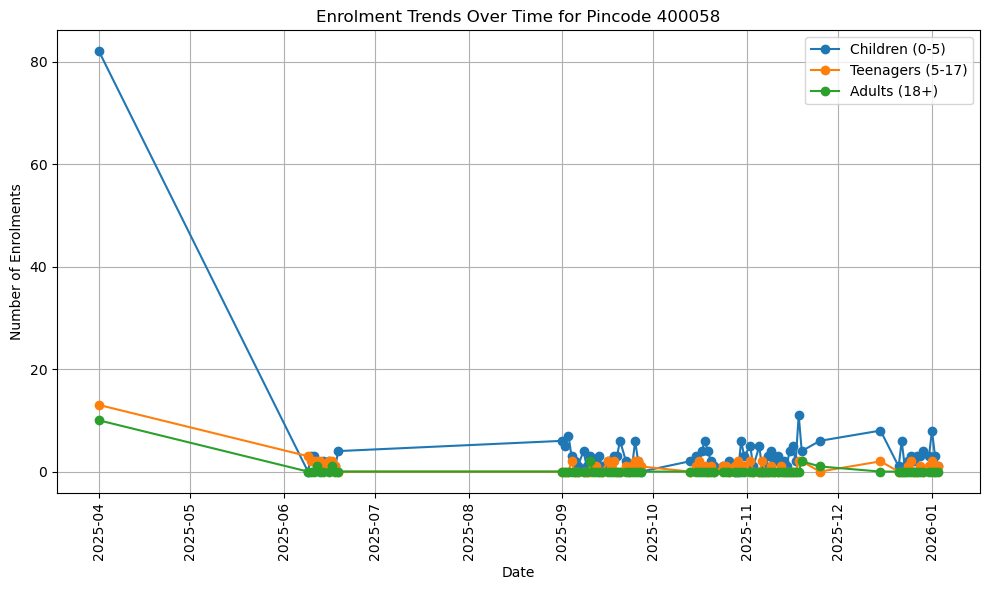

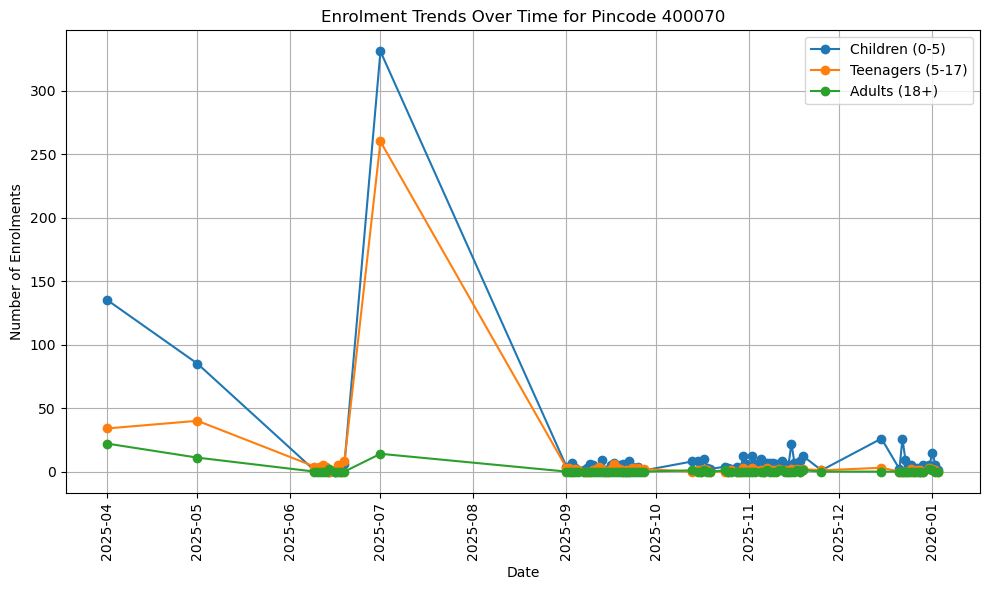

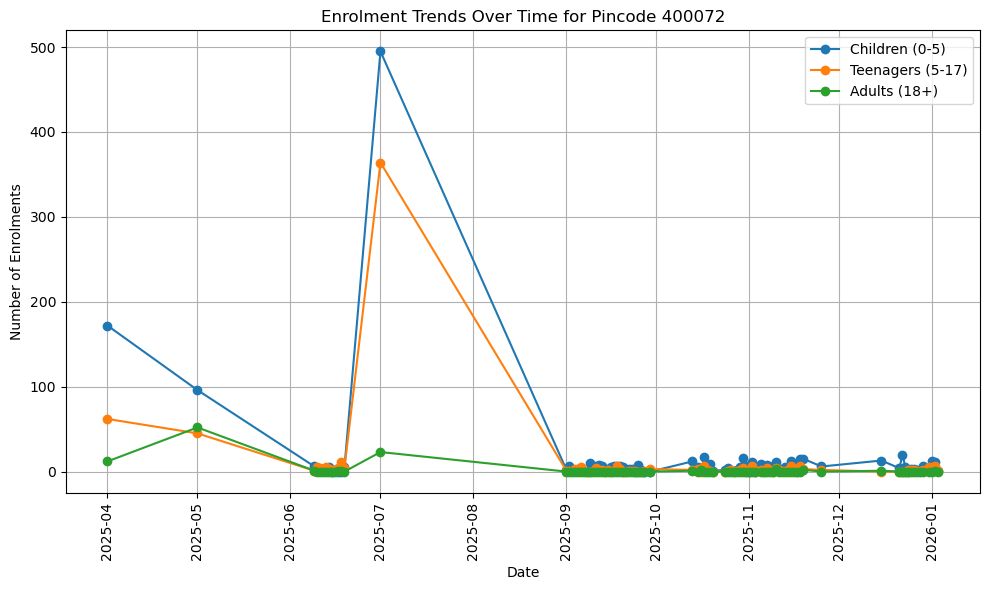

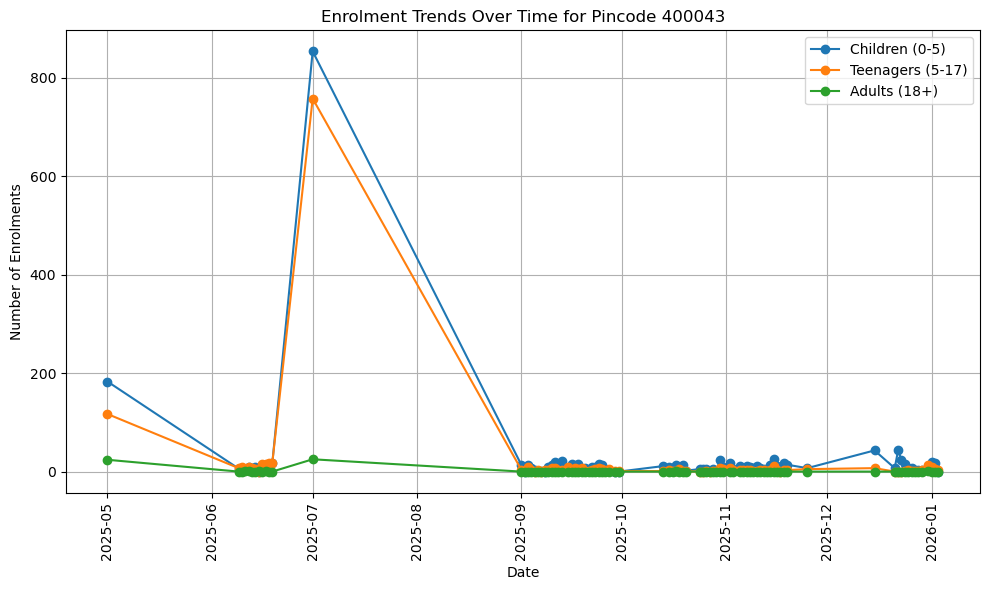

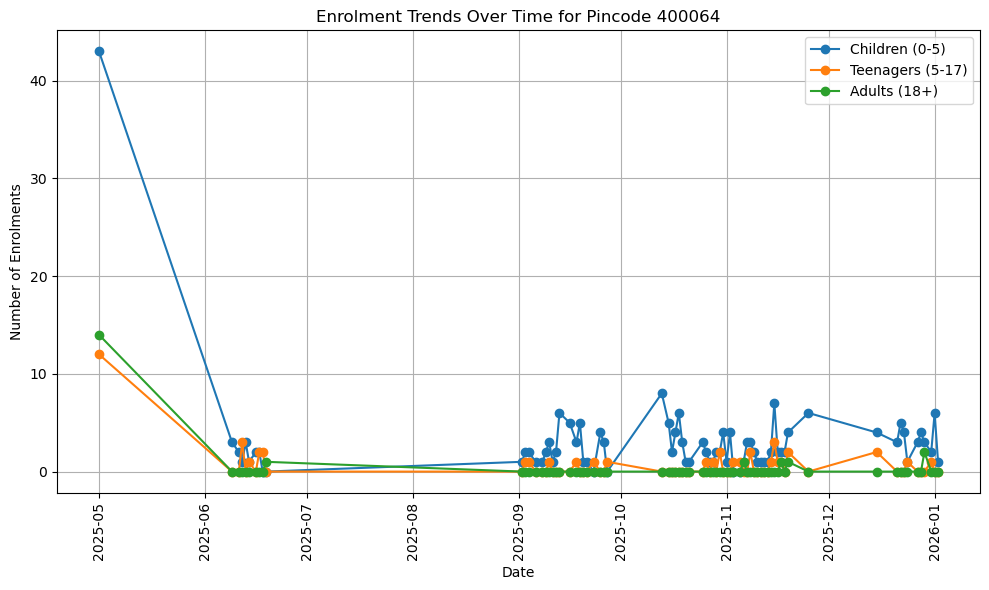

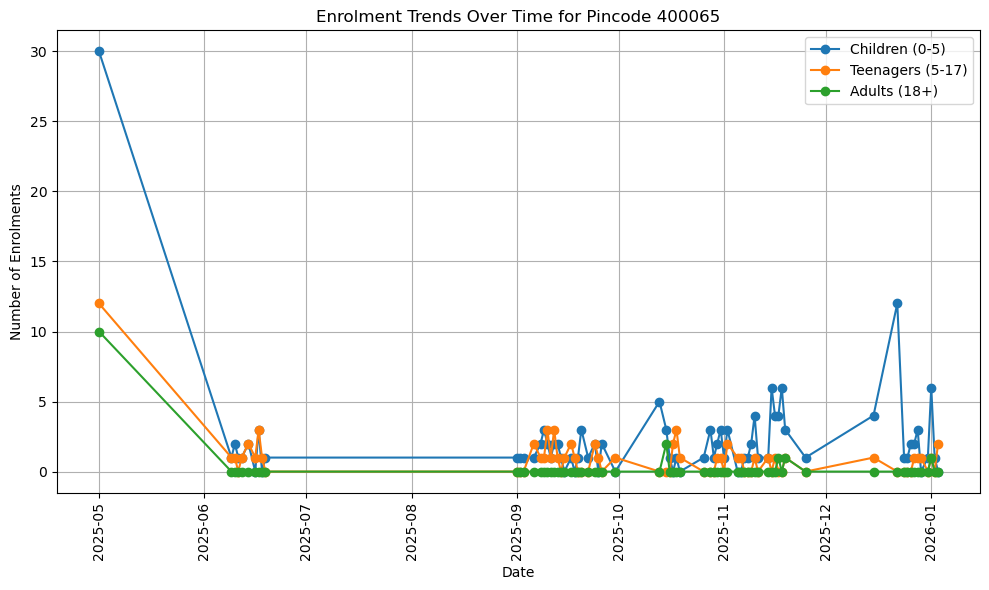

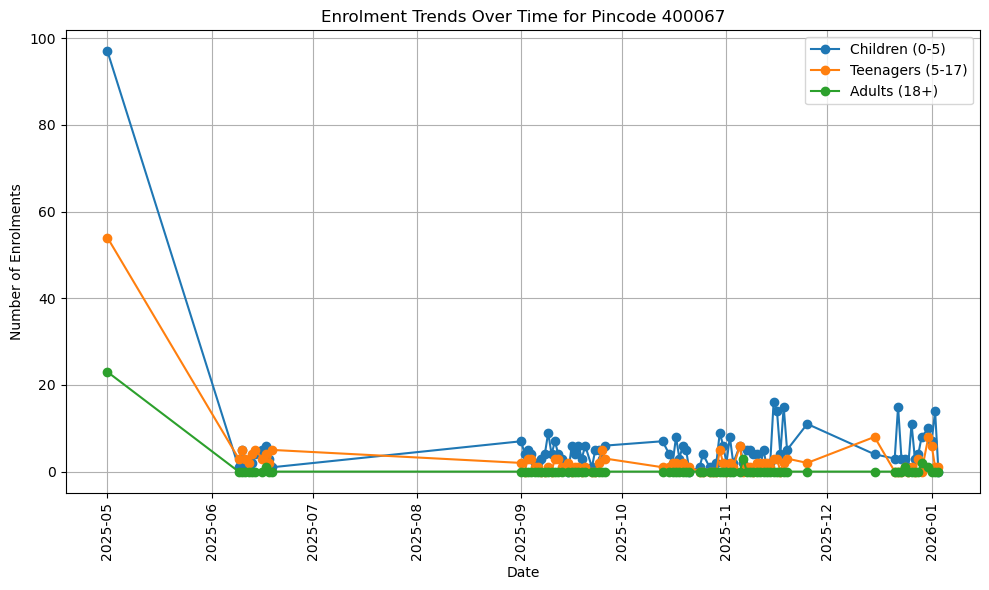

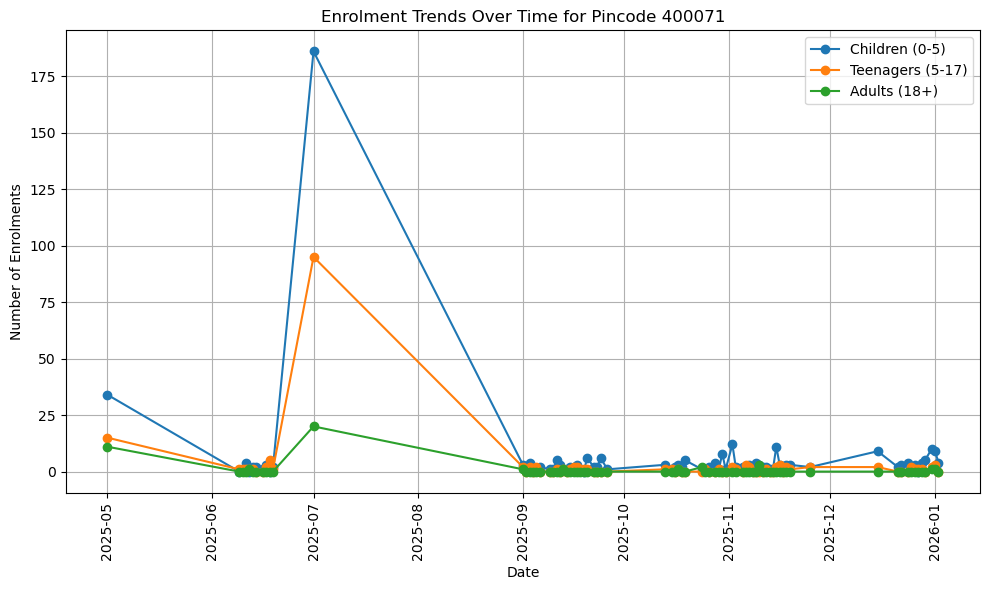

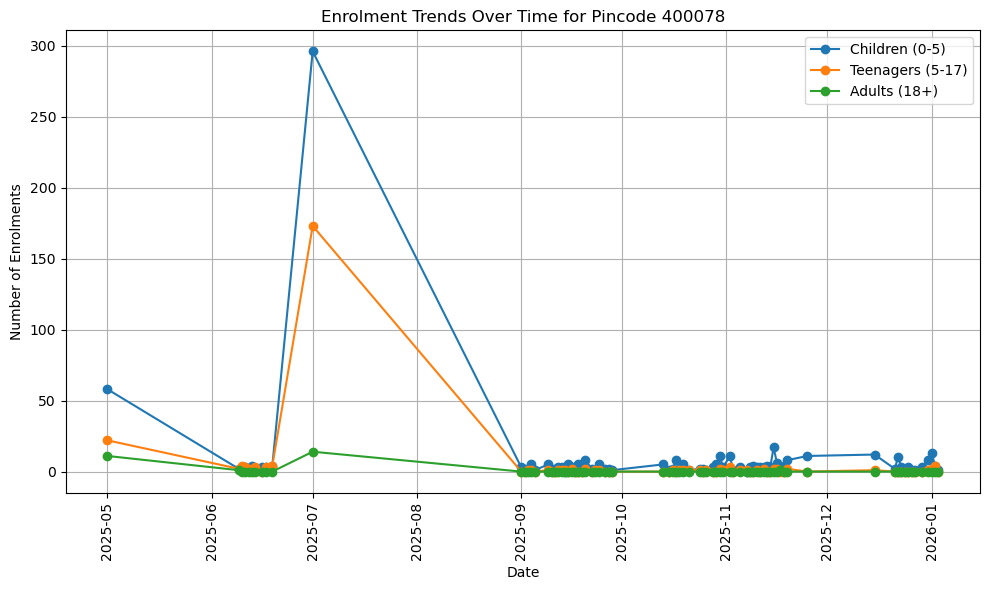

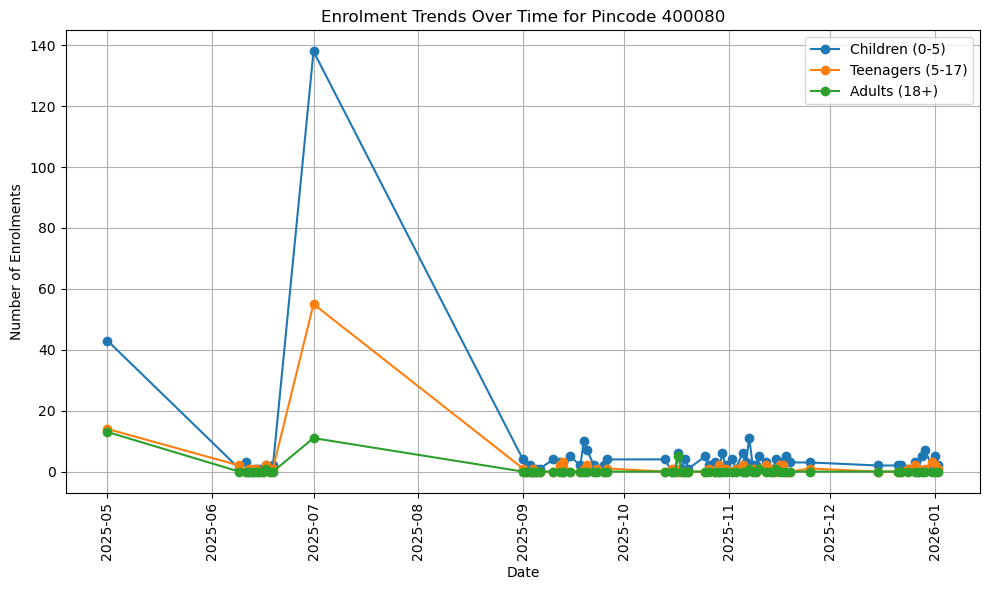

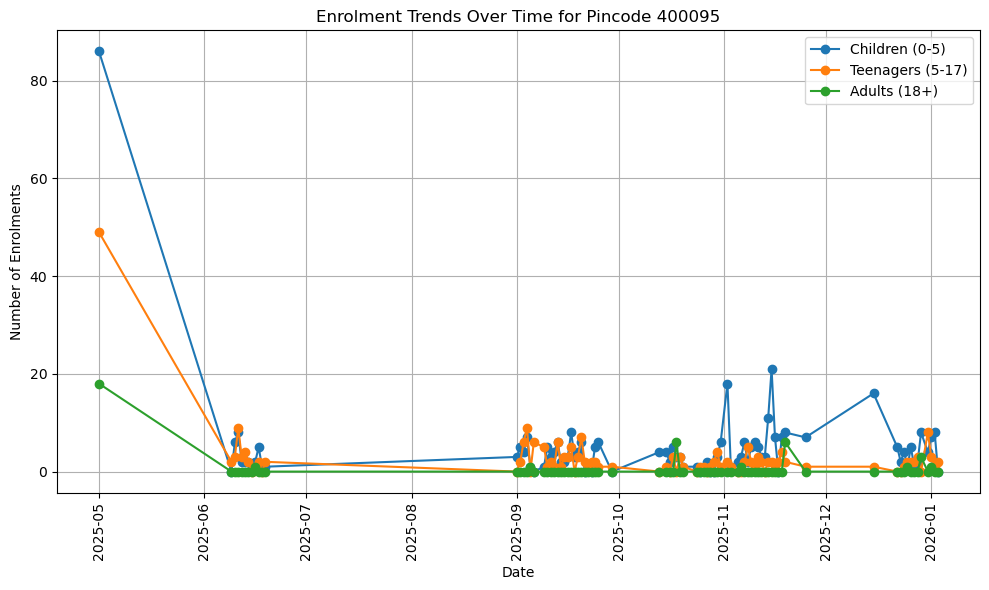

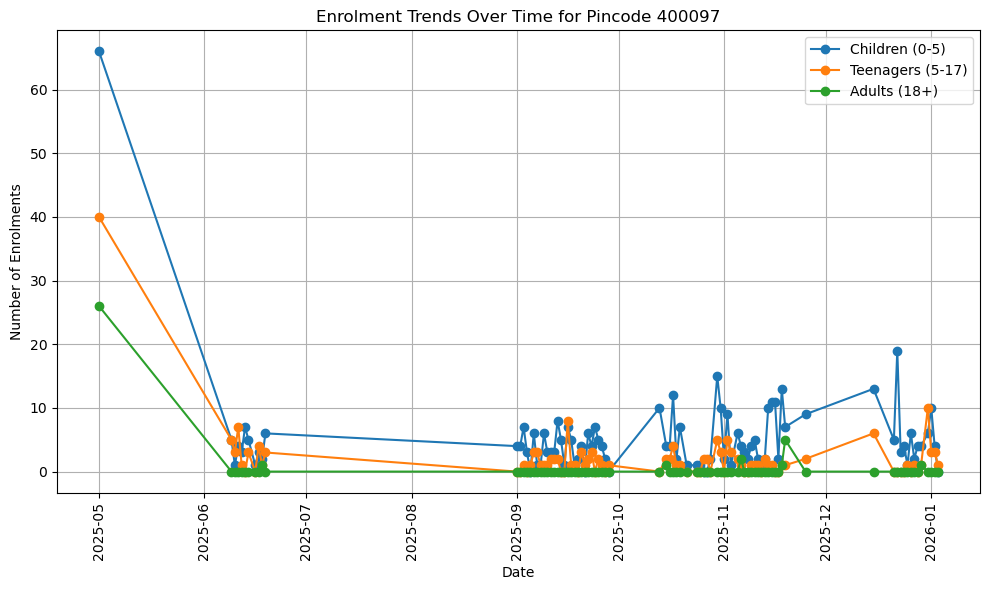

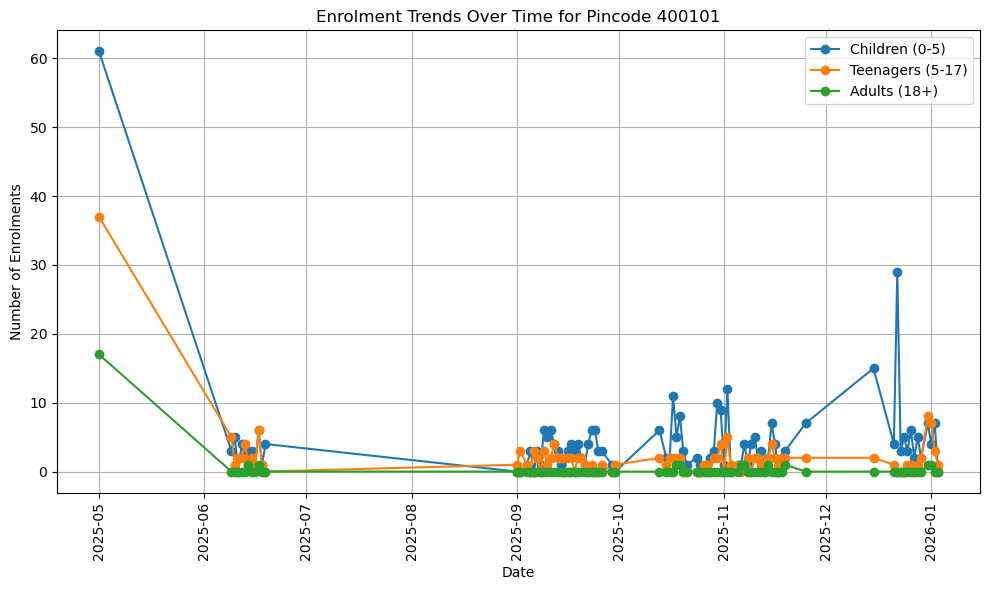

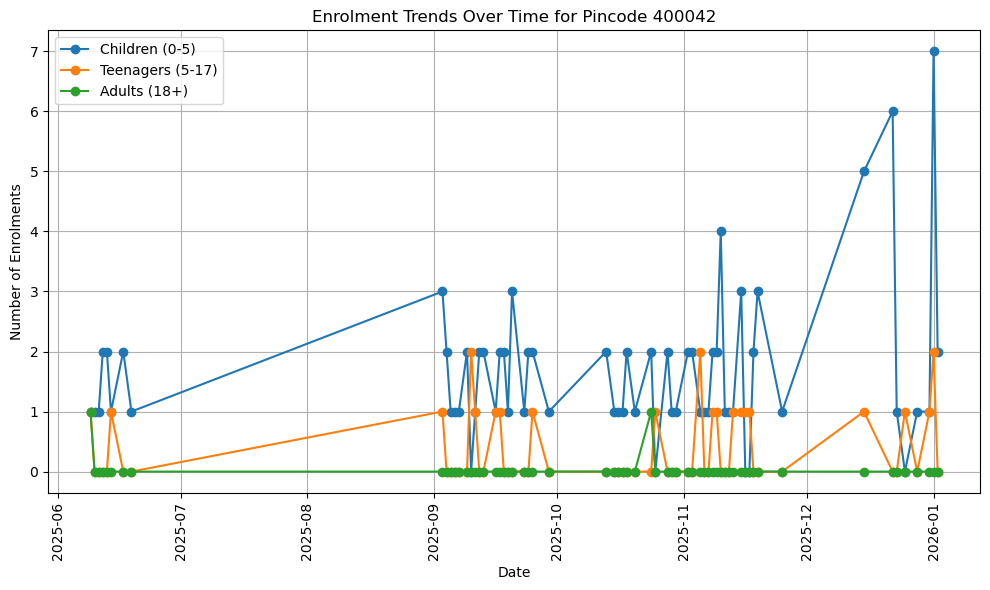

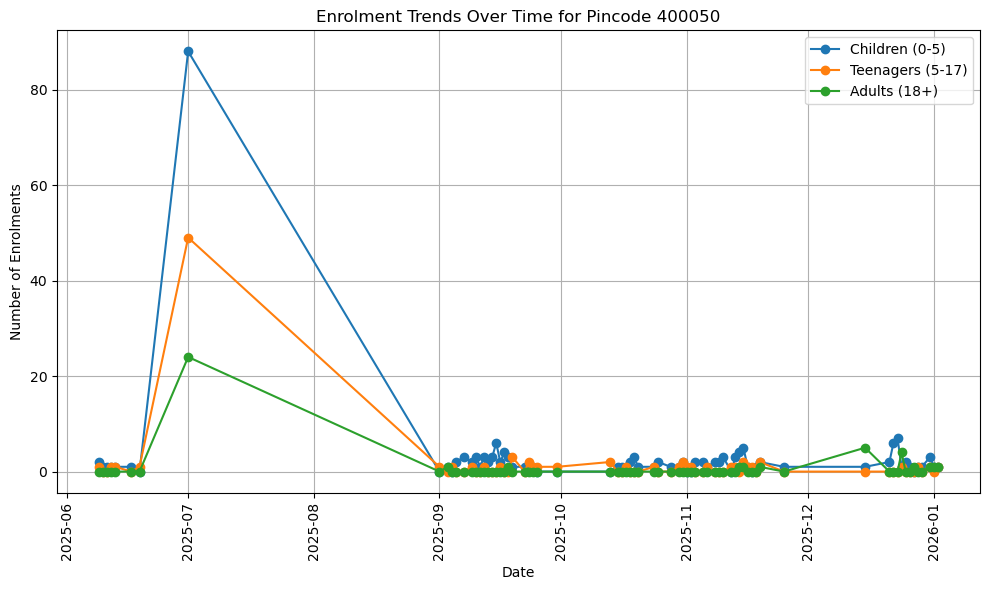

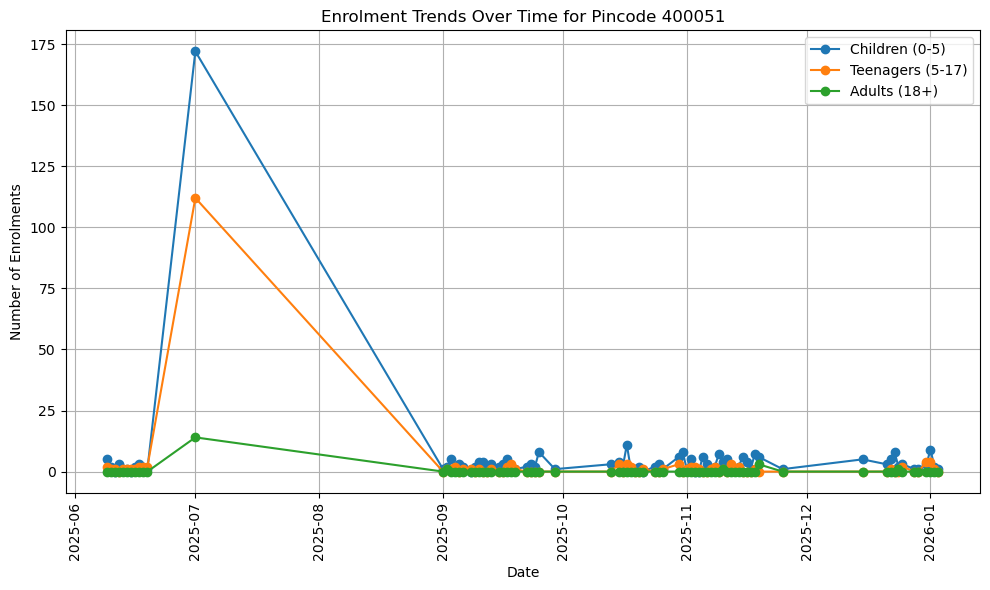

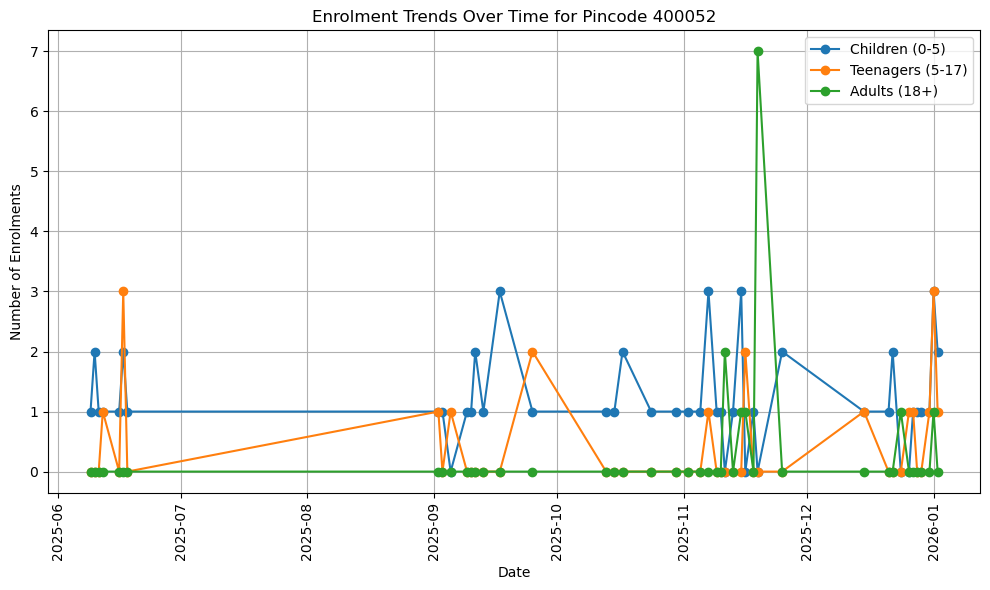

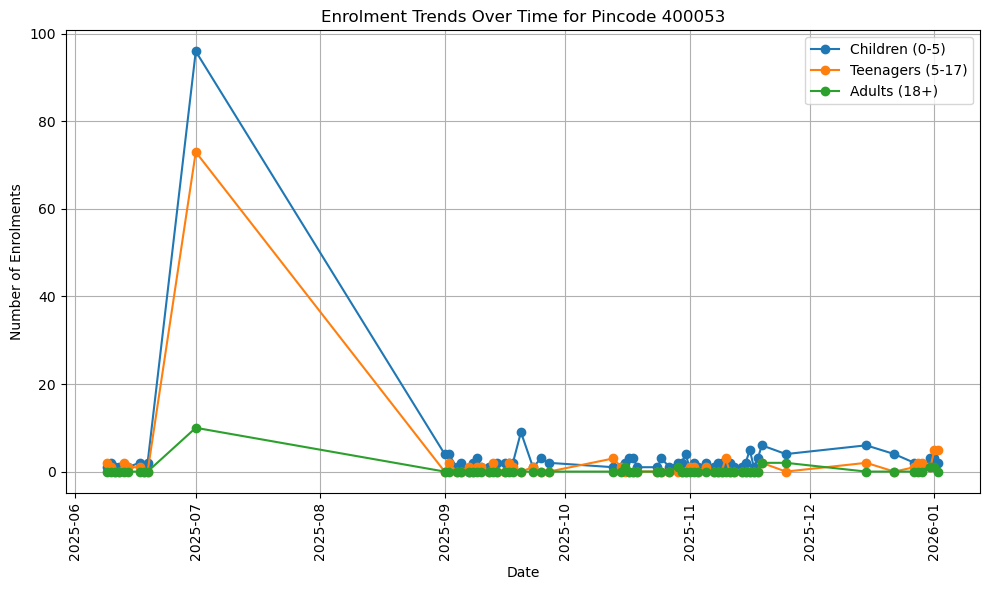

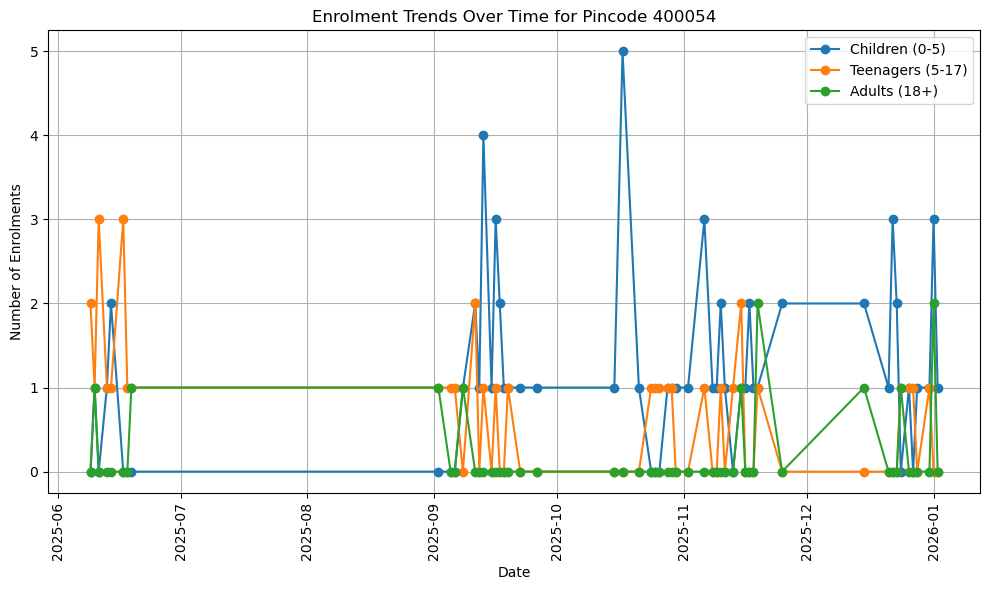

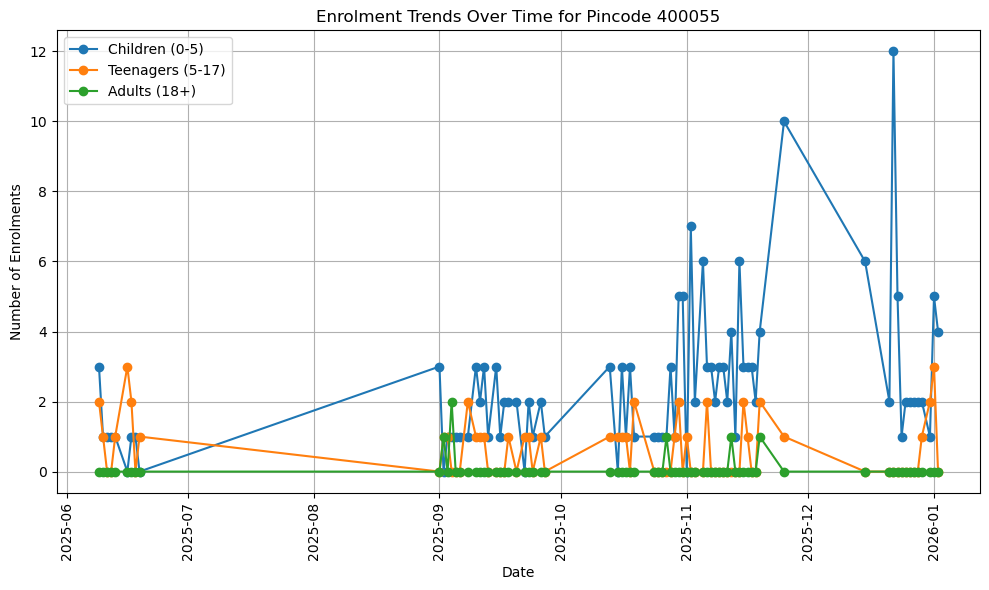

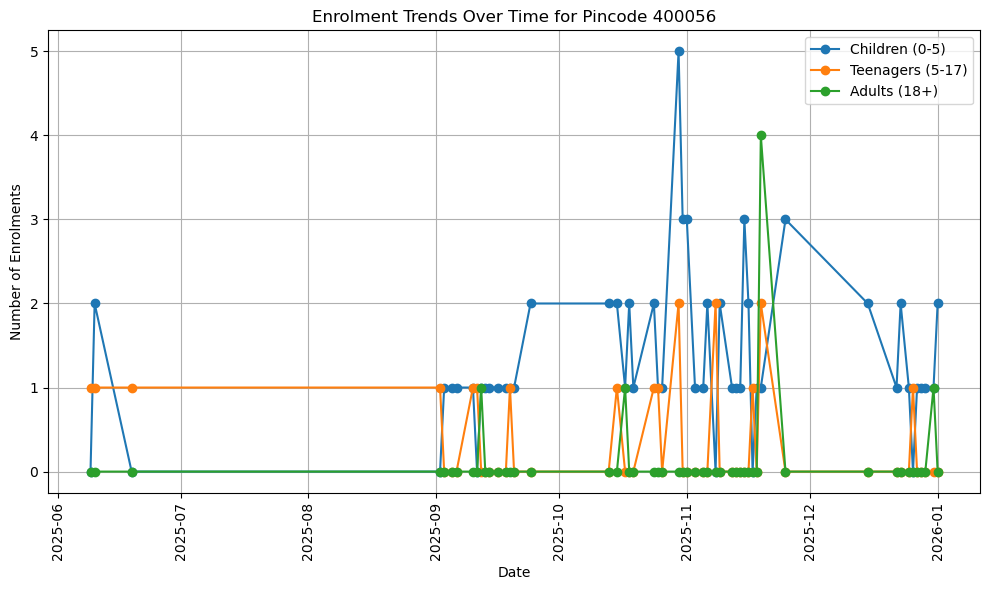

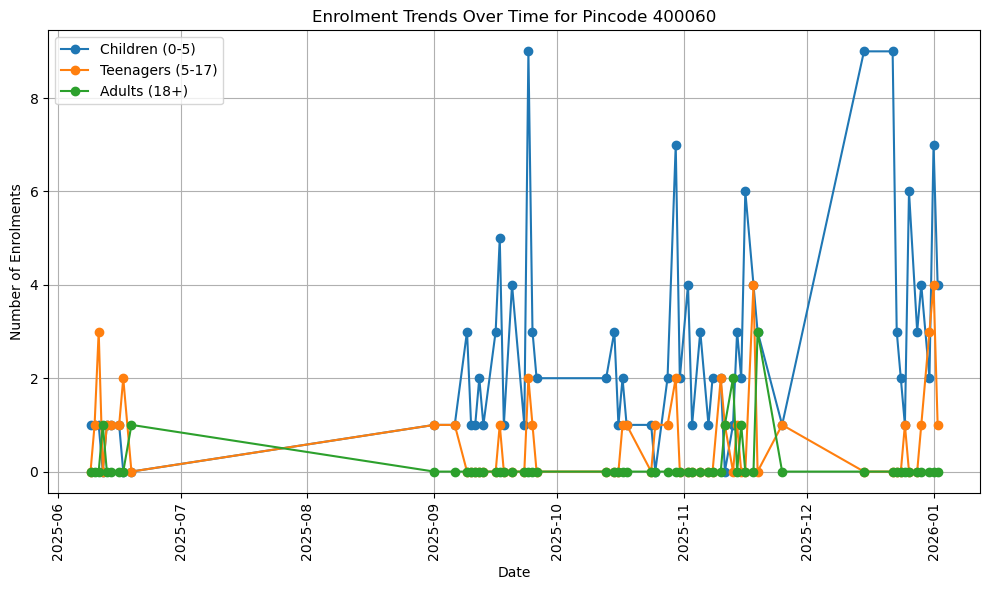

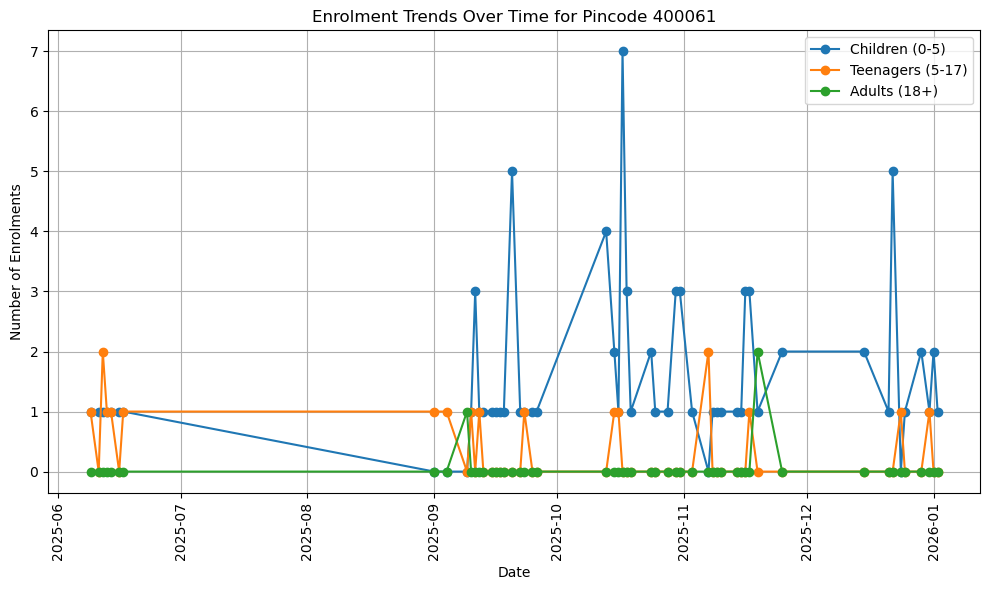

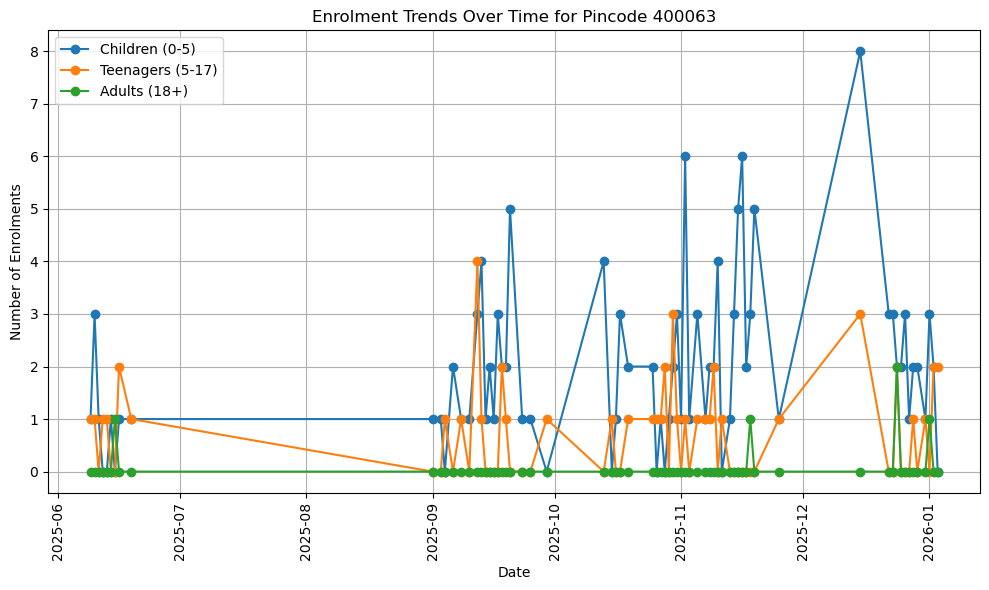

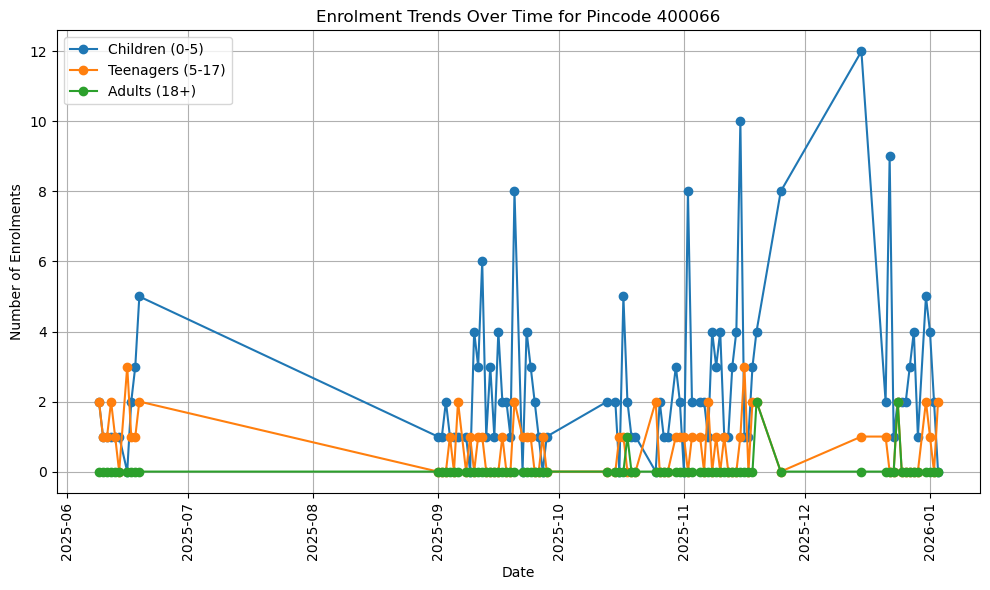

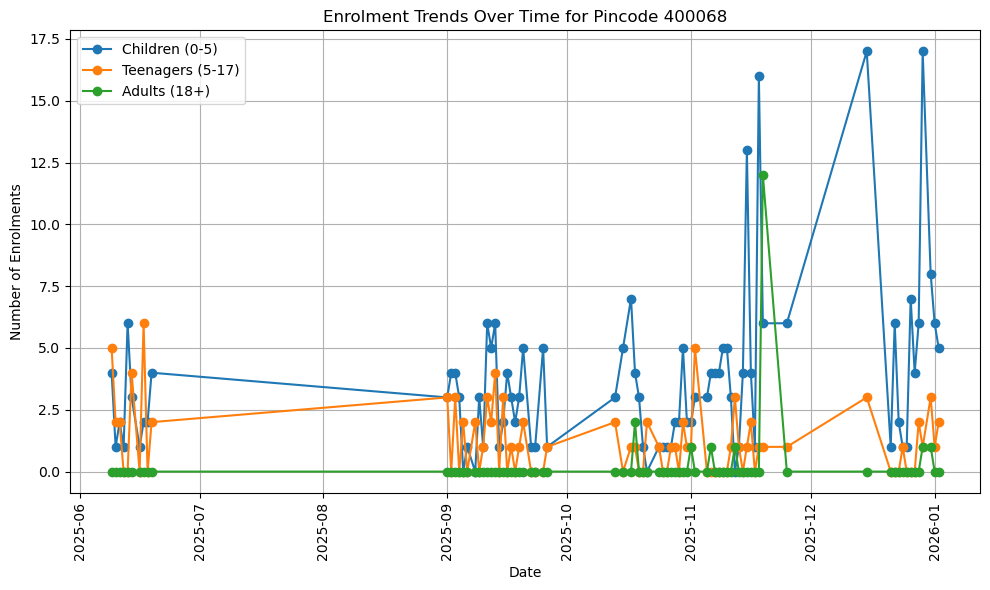

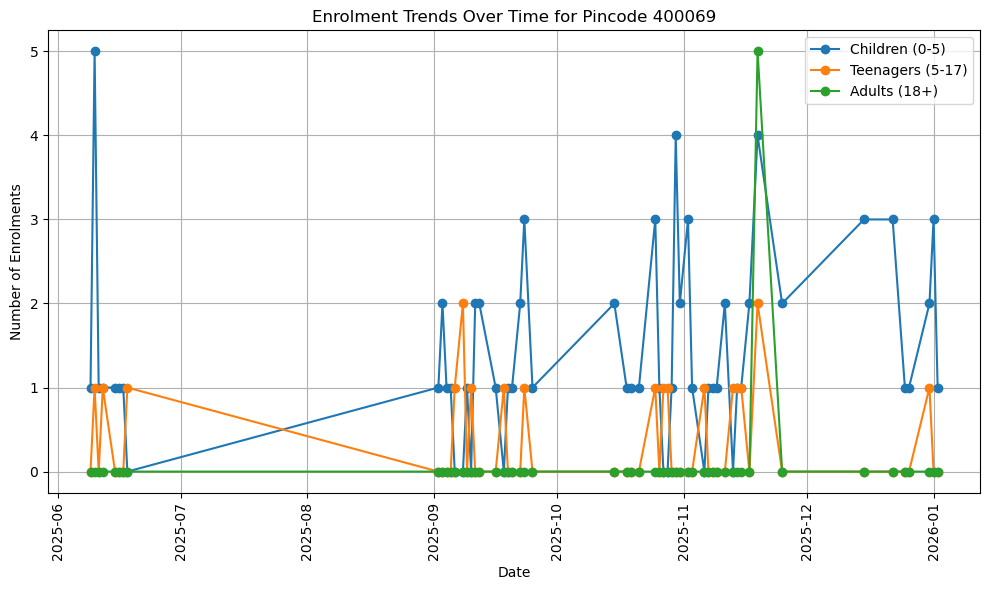

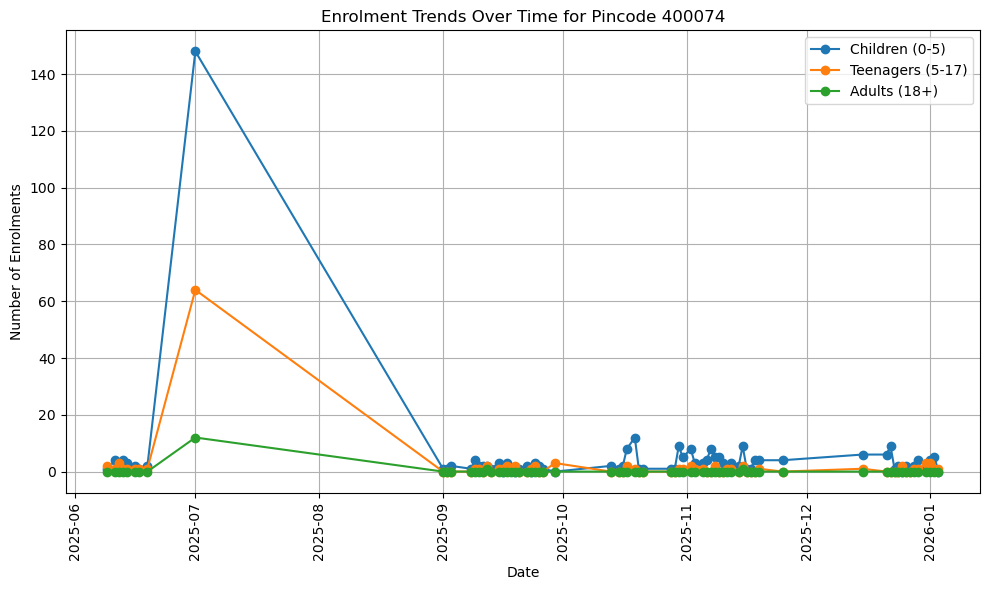

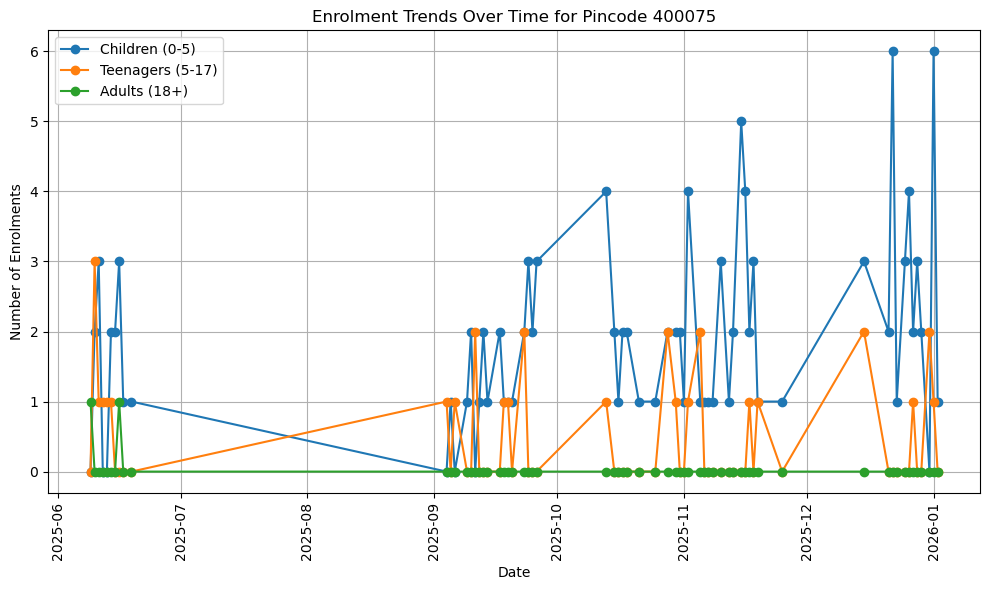

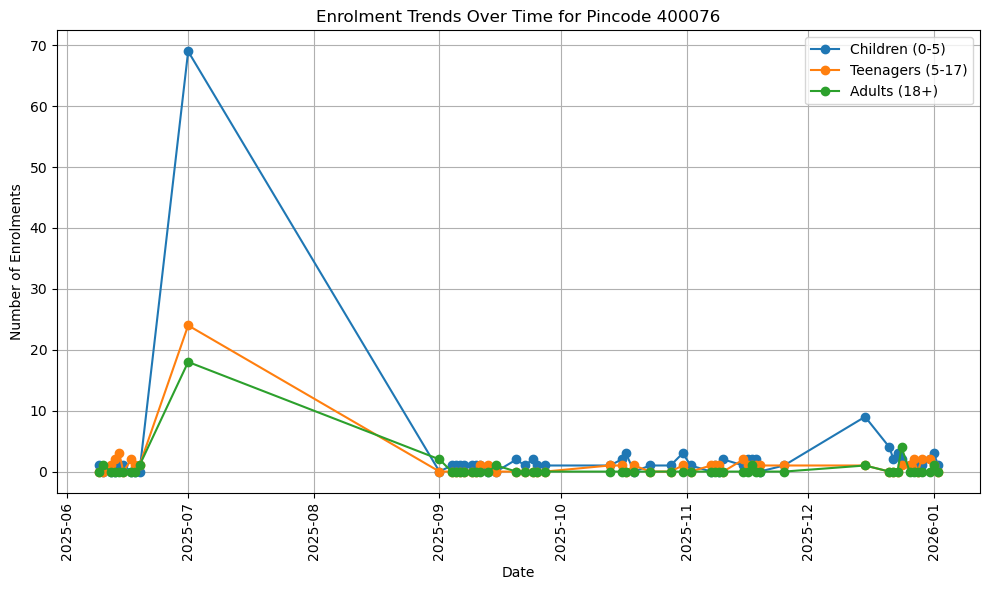

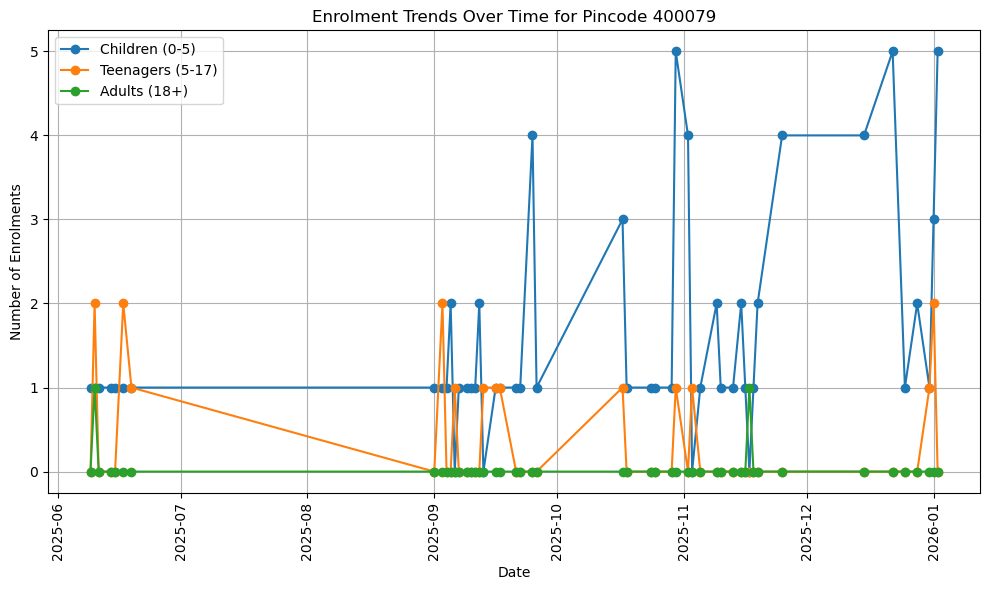

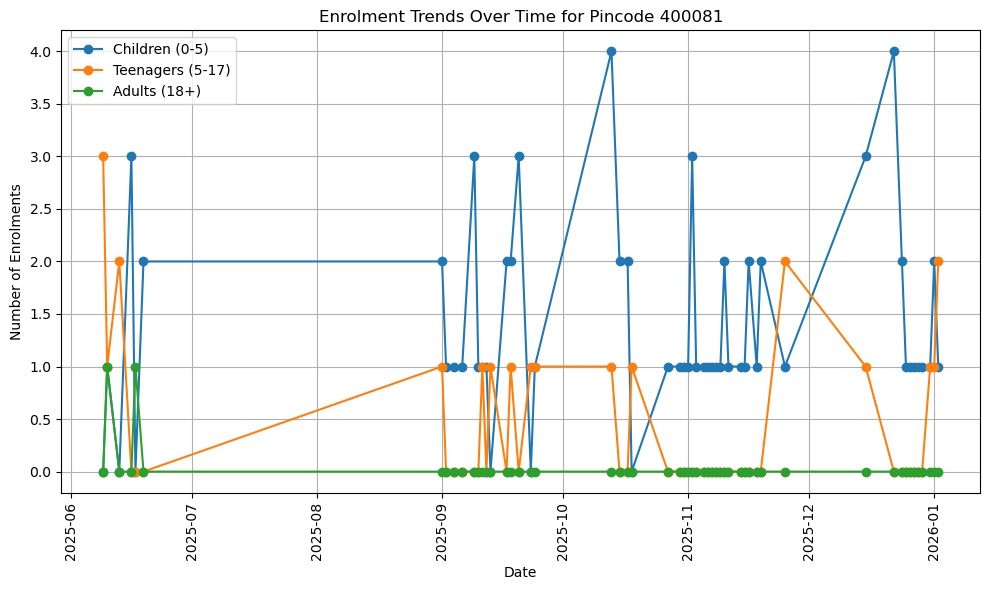

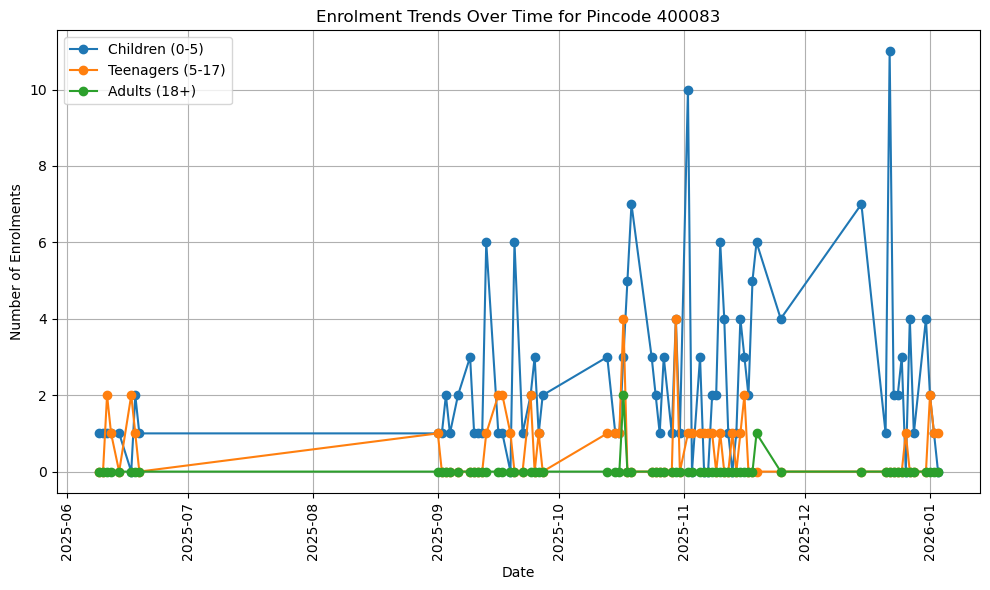

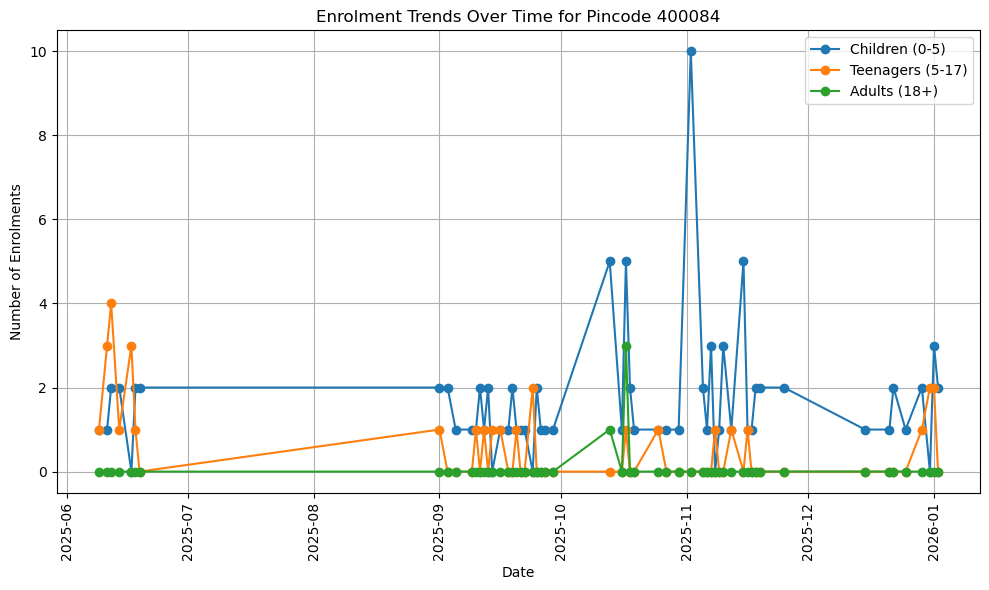

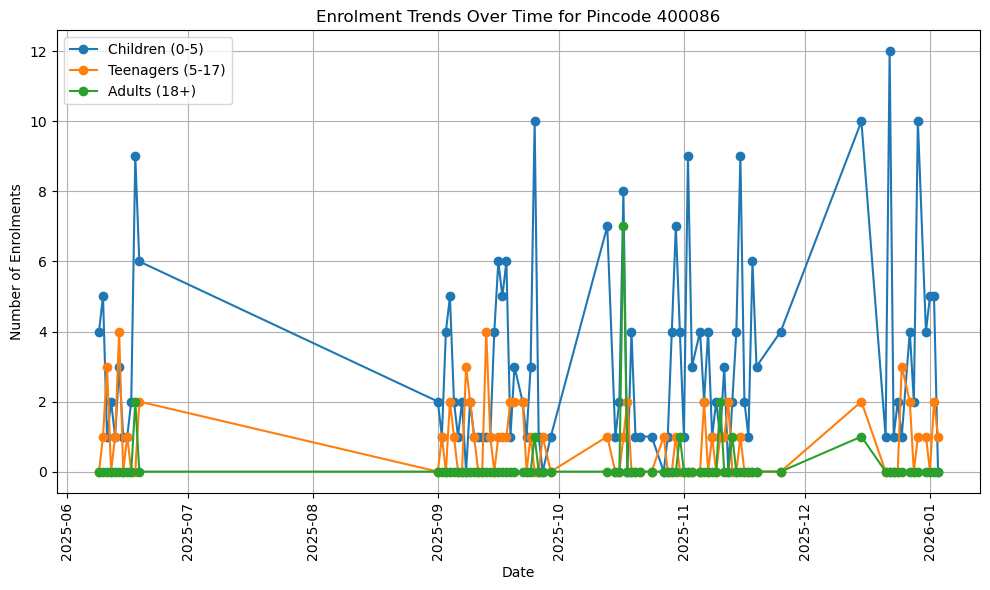

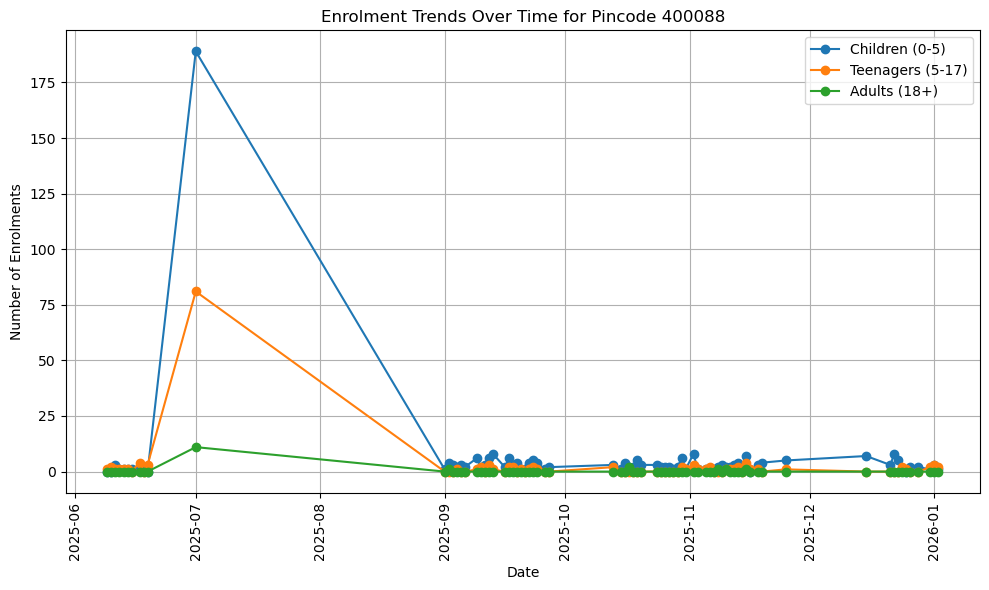

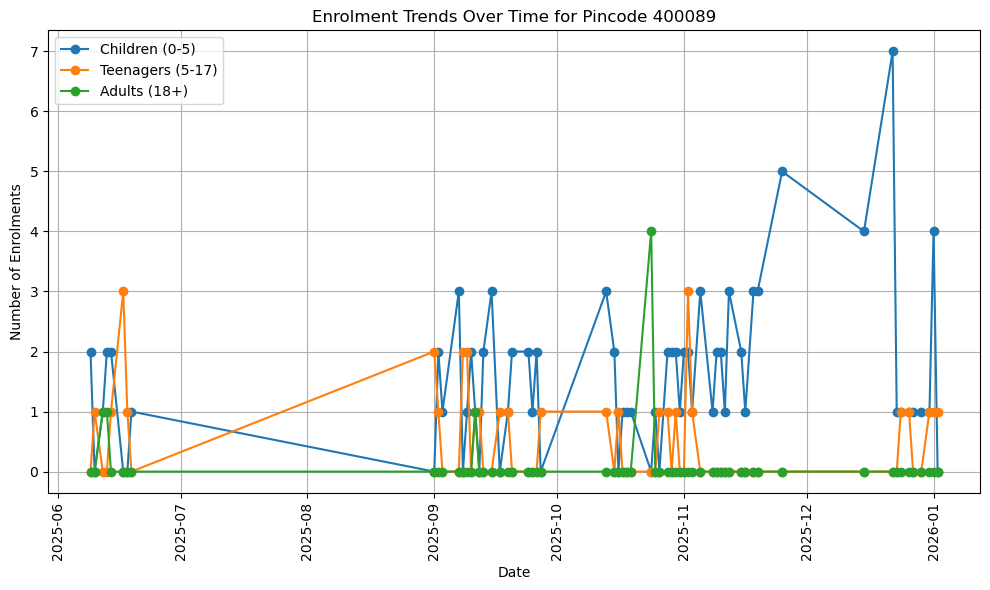

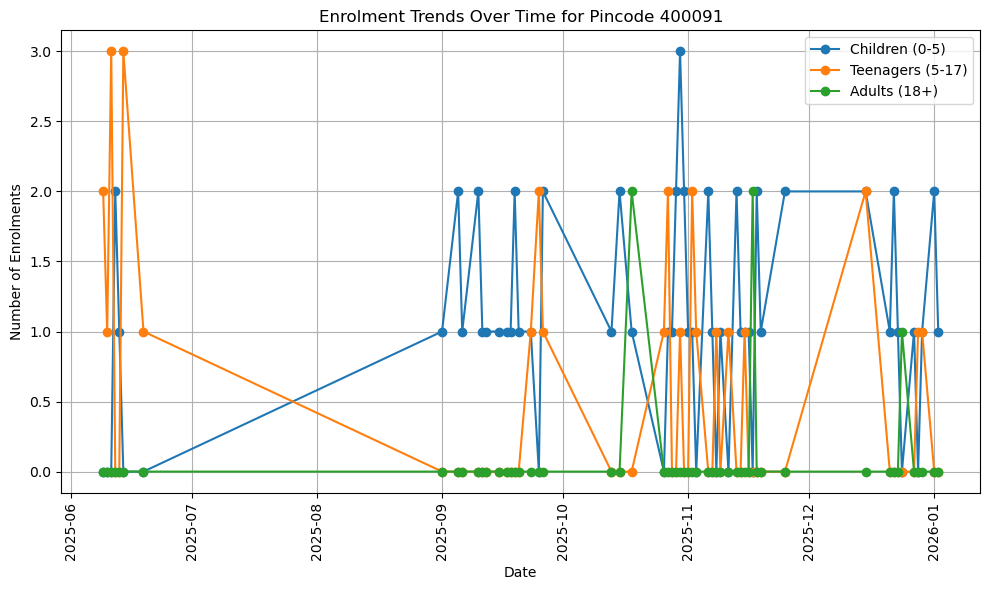

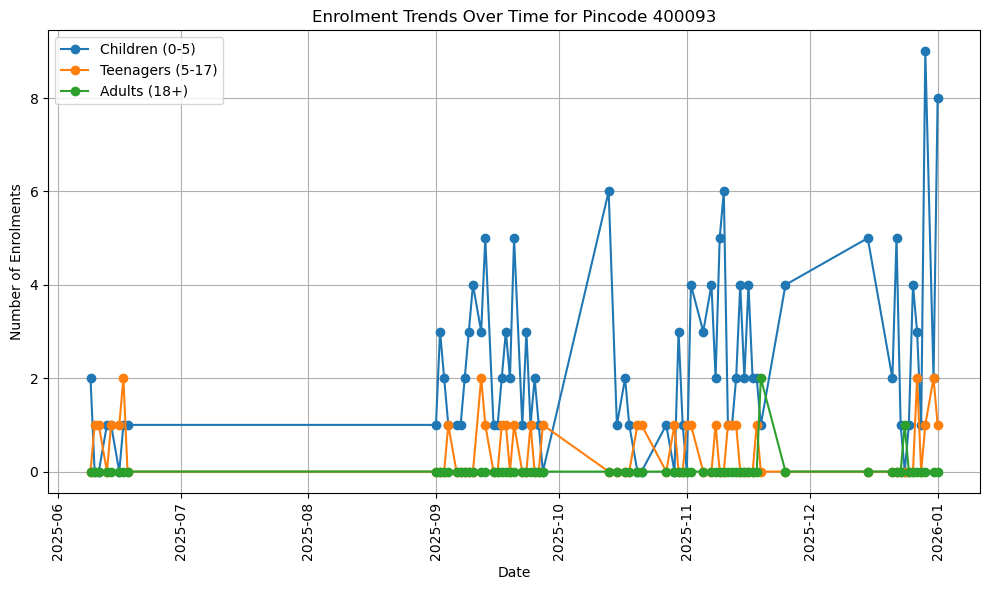

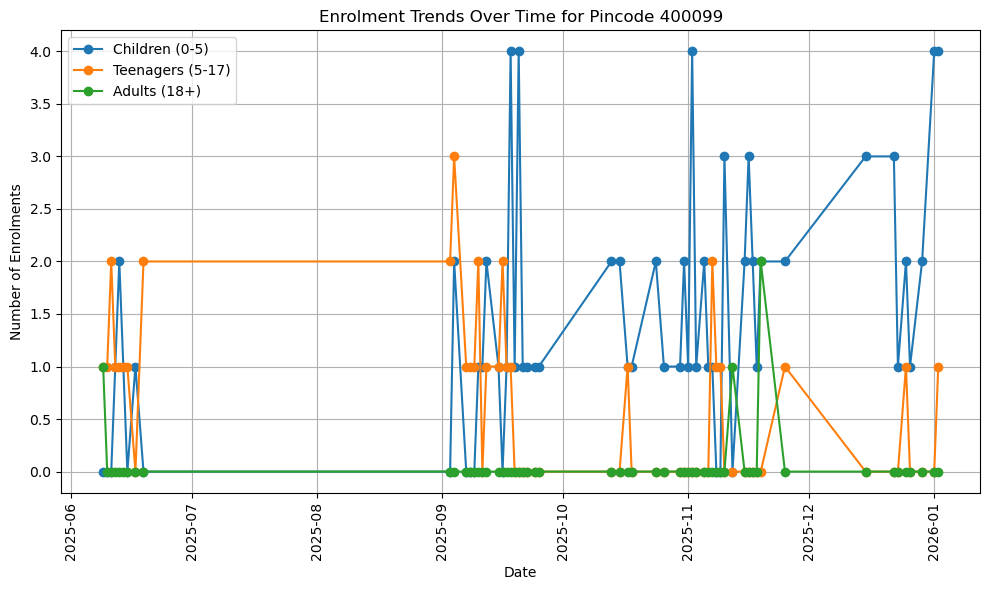

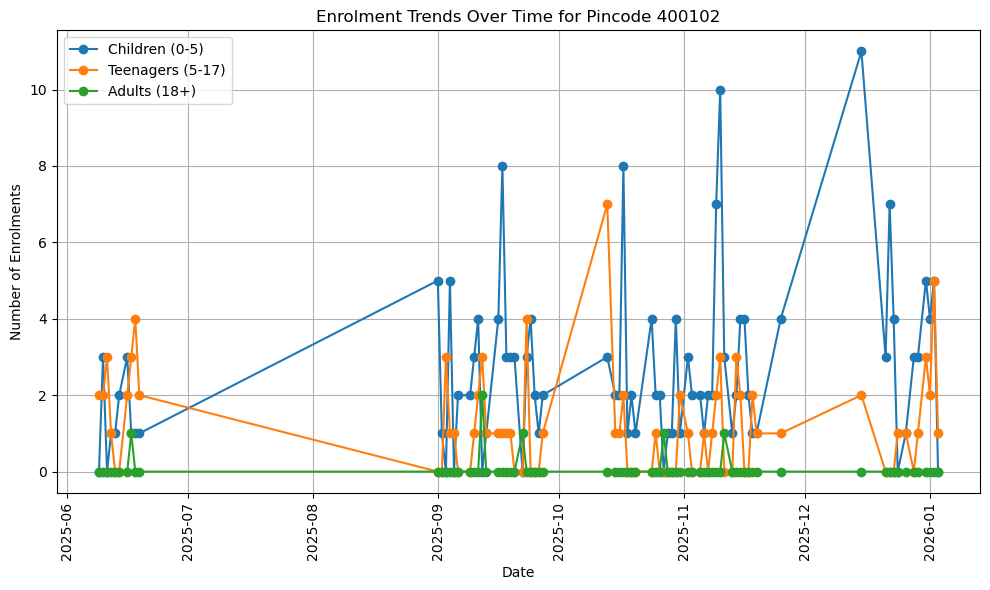

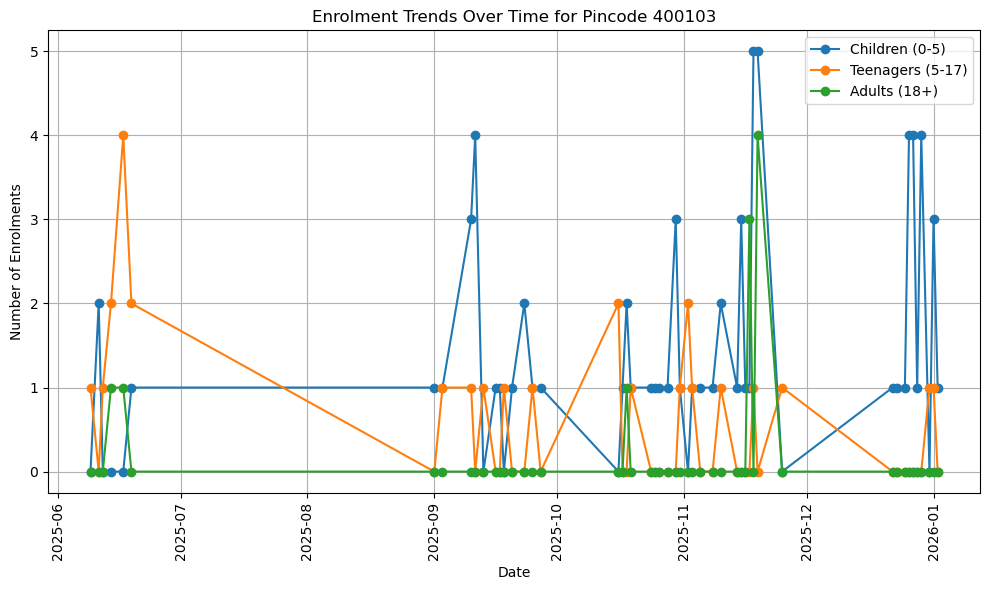

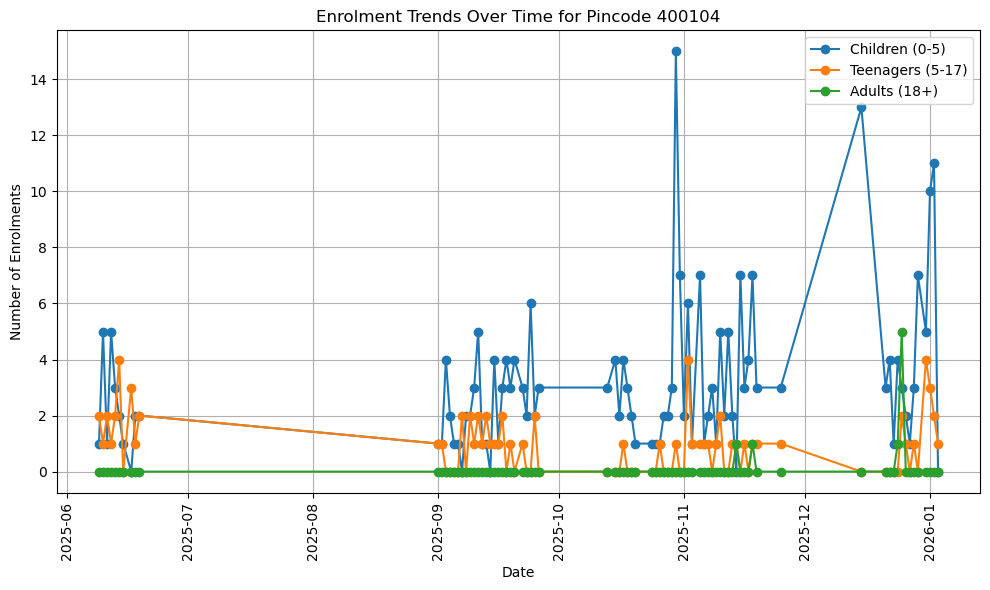

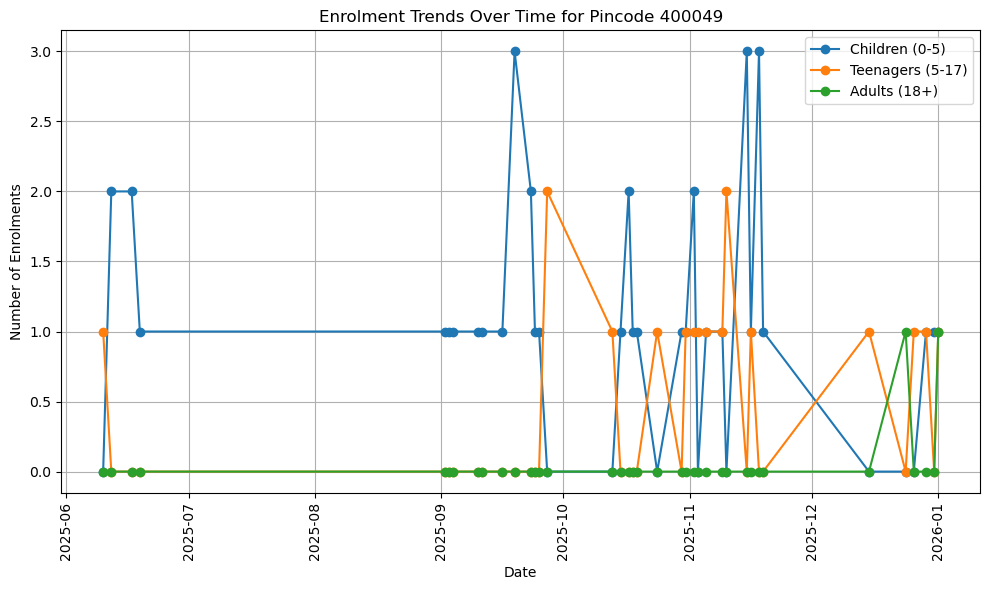

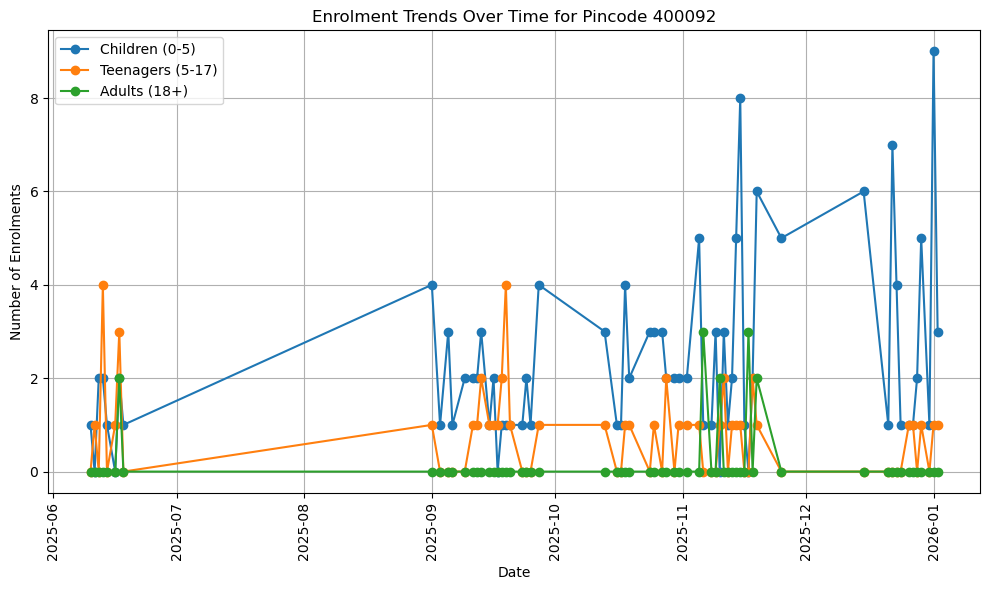

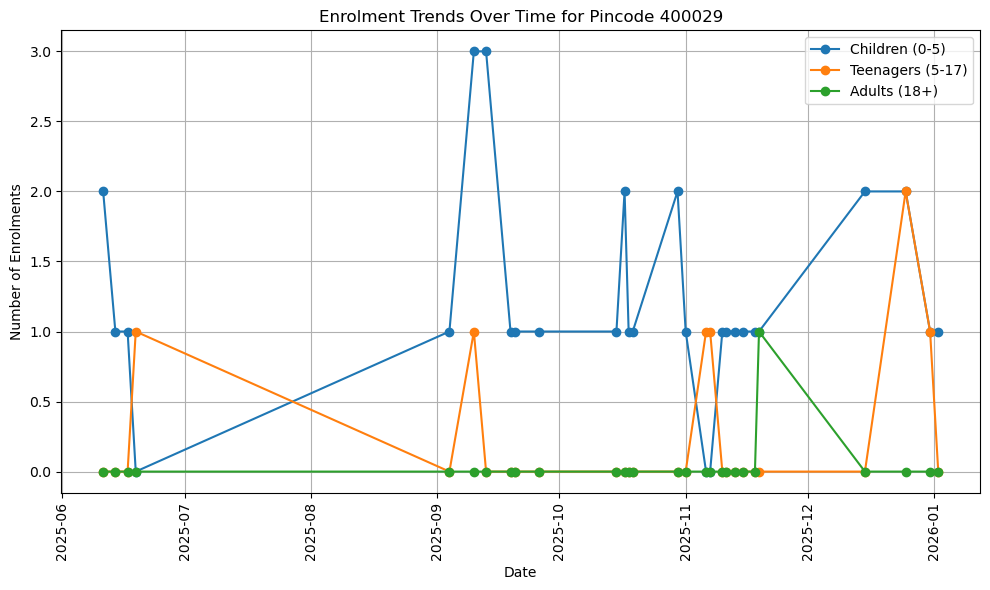

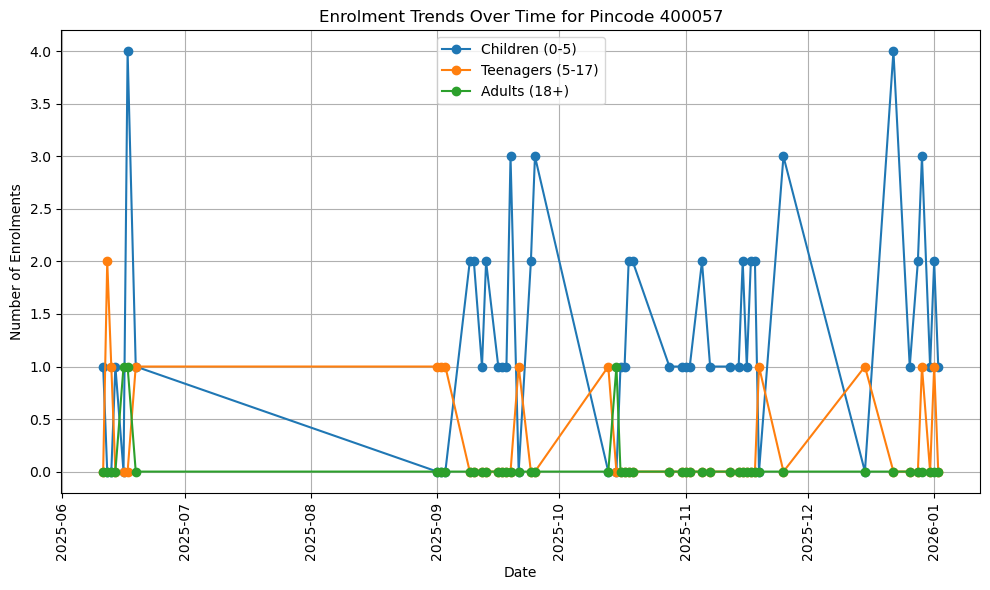

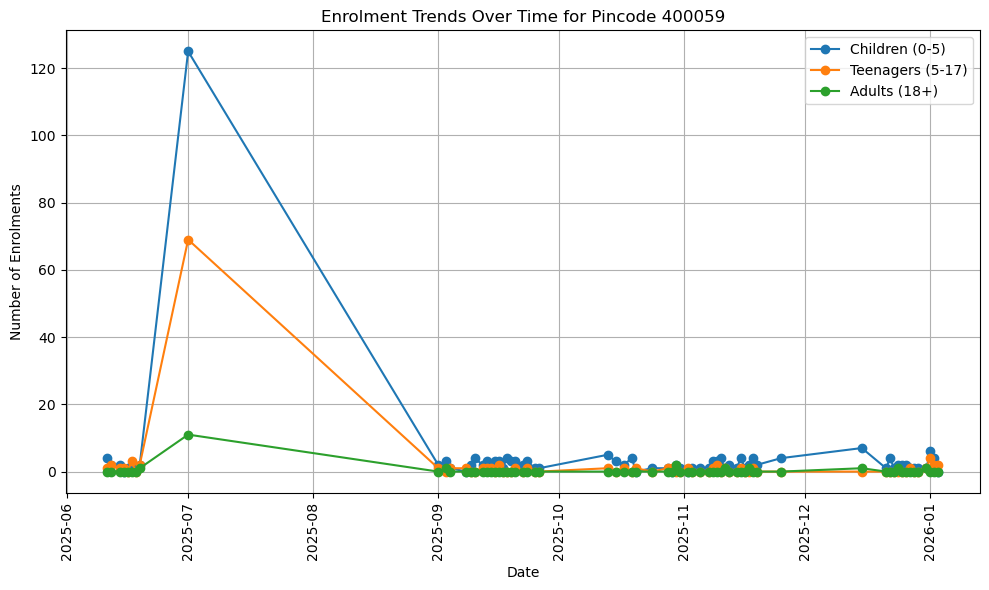

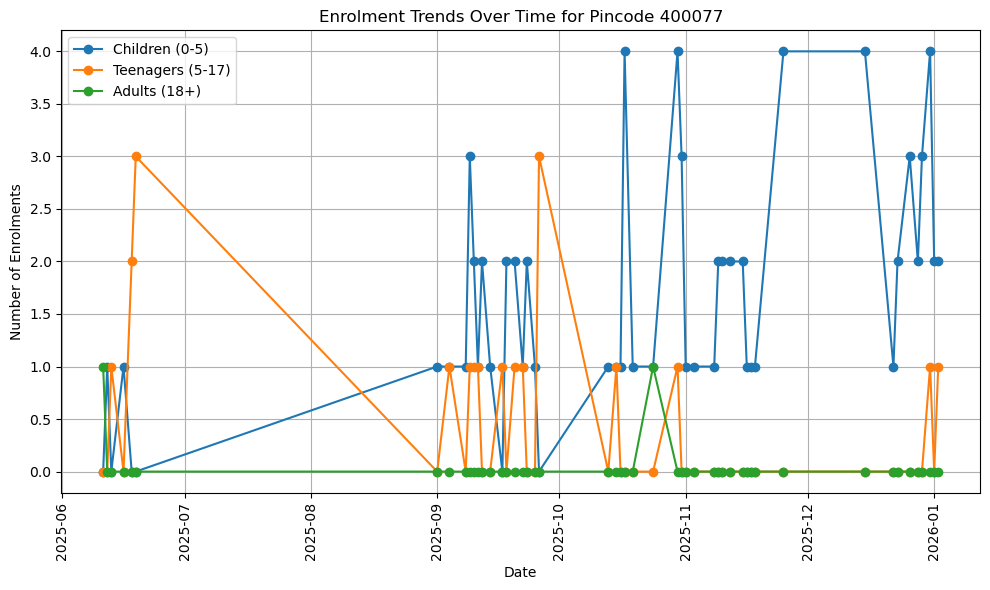

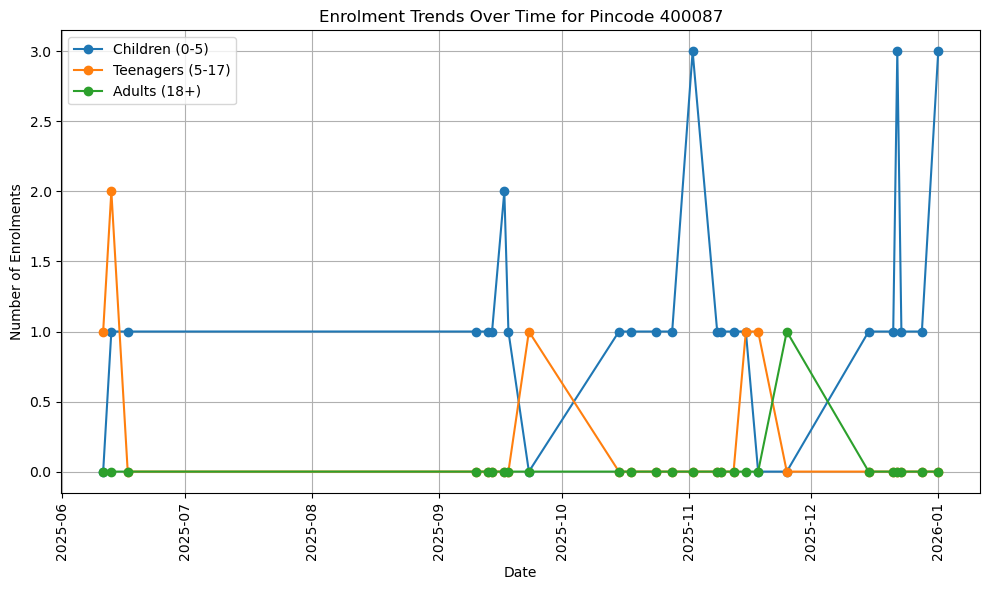

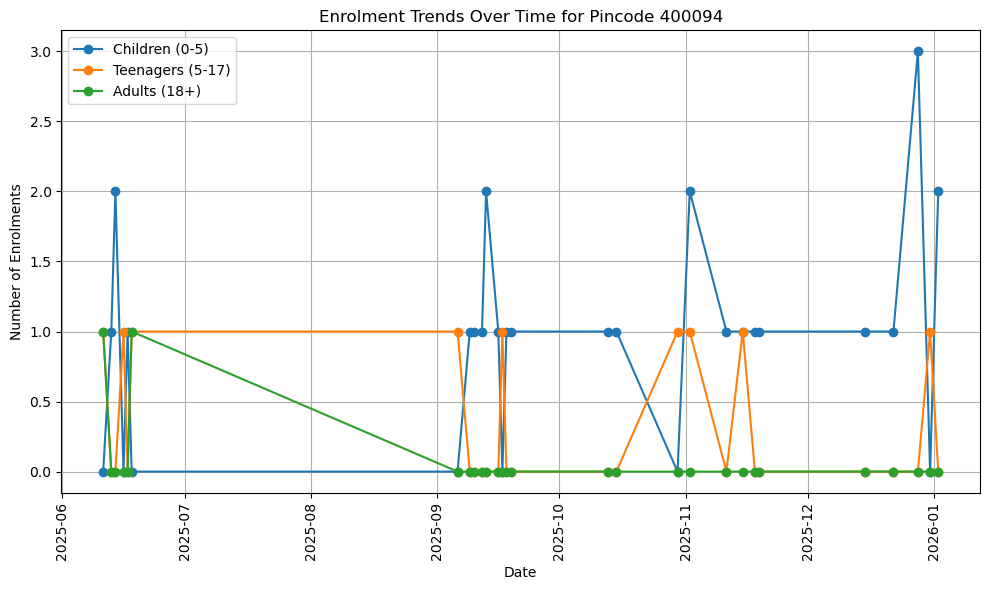

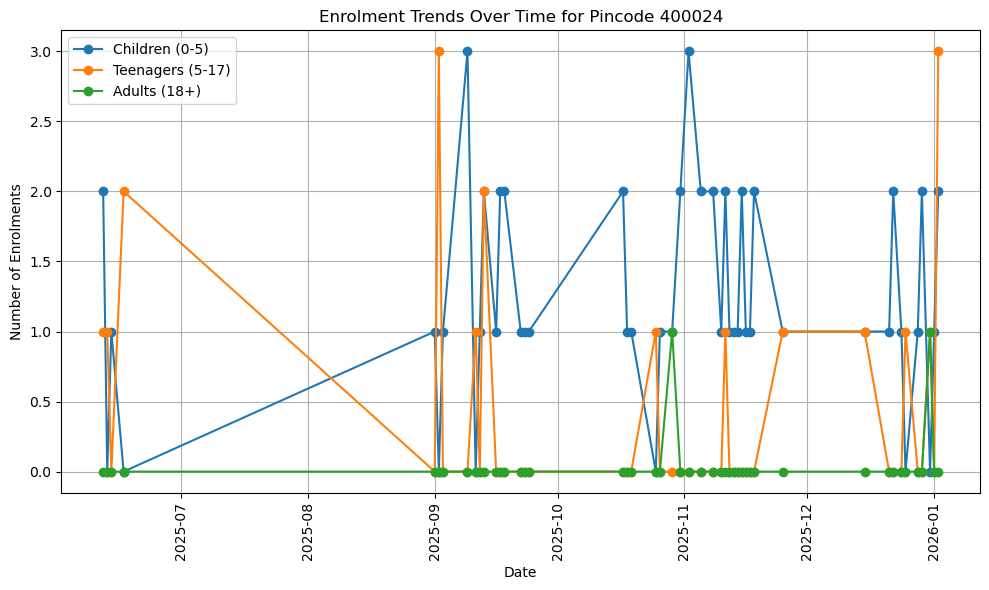

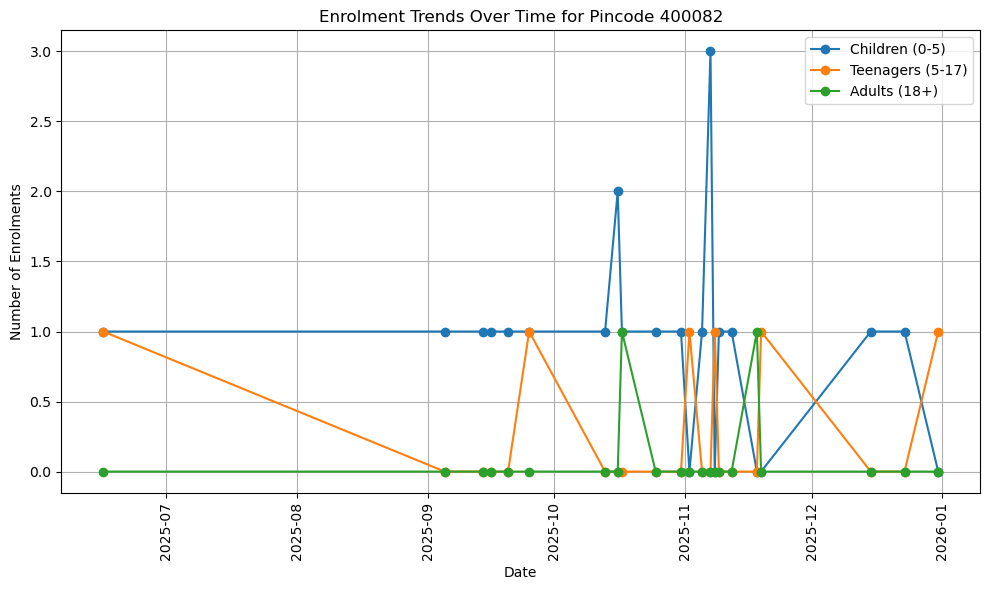

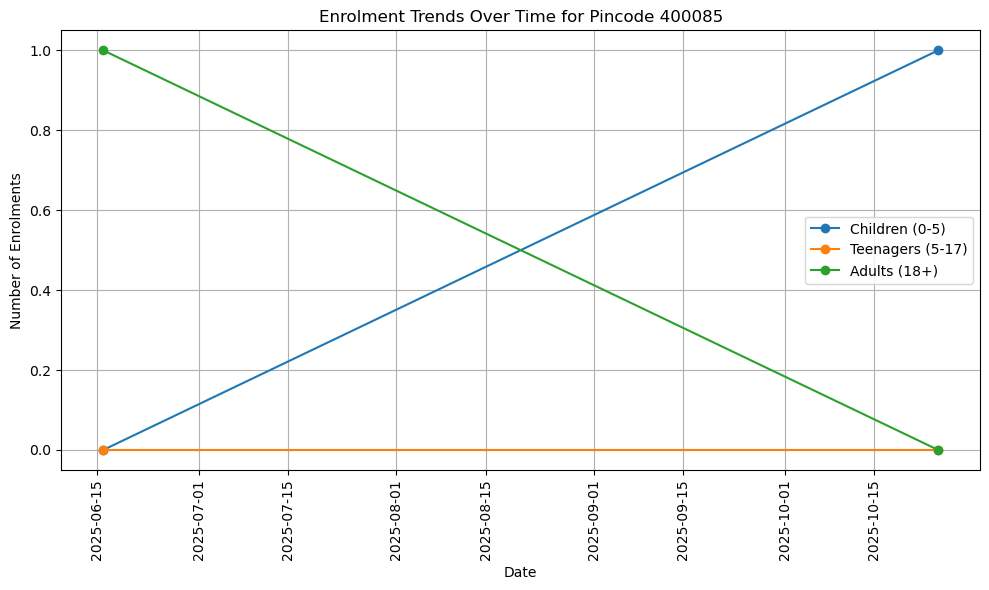

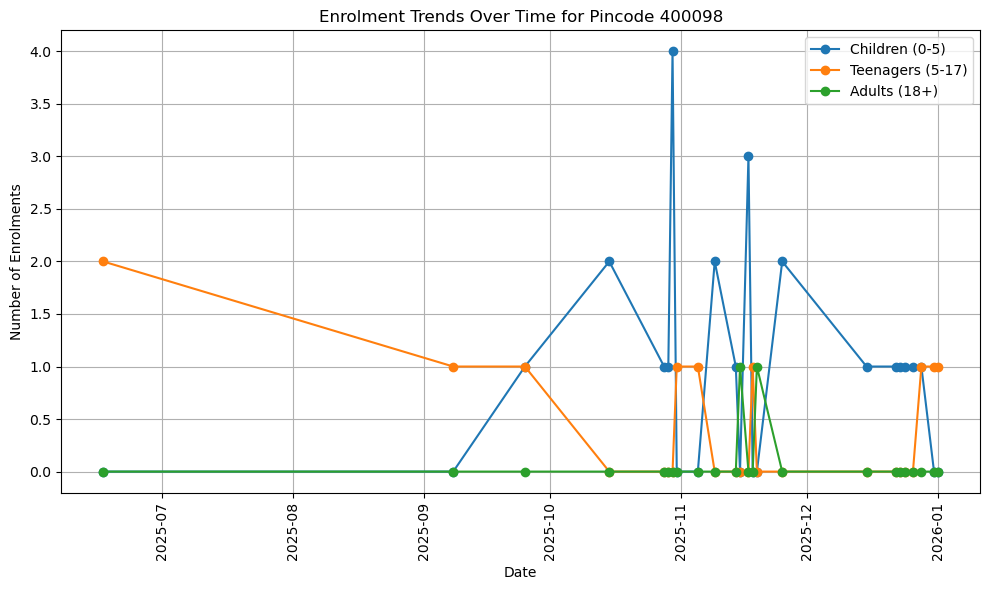

In [39]:
pincodes = df1['pincode'].unique()
for value in pincodes:
    df_pincode = df1[df1['pincode'] == value]
    plt.figure(figsize=(10, 6))
    plt.plot(df_pincode['date'], df_pincode['age_0_5'], label='Children (0-5)', marker='o')
    plt.plot(df_pincode['date'], df_pincode['age_5_17'], label='Teenagers (5-17)', marker='o')
    plt.plot(df_pincode['date'], df_pincode['age_18_greater'], label='Adults (18+)', marker='o')
    plt.title(f'Enrolment Trends Over Time for Pincode {value}')
    plt.xlabel('Date')
    plt.ylabel('Number of Enrolments')
    plt.legend()
    plt.grid()
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()